
# Introductions

This is the coursework of F21DL for Team 7. In this coursework, the team will import a dataset for Traffic Signage and apply different analysis and machine learning teqnuiques to produce interesting findings and hopefully classification and recognition capabilitites.

#Problem Statement & Objectives
This dataset containing a grayscale array-like csv that is meant to traing a model to classify a class. Threfore, the objective is to classify, not to predict. Mostly, supervised learning will be the selected approach.

 Ideally, the system should classify correctly all testing data at a success rate of 100%. Performance should be measured as a percentage of the correct classifaction.

#Assumptions
Target accruacy is 90%+

Image processing techniques will not be applied, focus will be on classifying through analyzing the data and applying ML techniques


Provided dataset will not be split since both training data and testing data are provided (Do we need to add a validation dataset?!)


#Data Exploration
In this section, the following exploration techniques will be evaluated. The objective is to understand the data and apply techniques to differenciate the classes further:
1. Import the data
2. Review data shape
3. Check records, missing records, out of domain, etc.
4. Review lables, number of records per class
5. Visualize the dataset, plot pictures
6. Histogram the records (multiple views)
7. Standaraization & Histogram after applying
8. 2D & 3D Clustering with tSNE

In [12]:
# Common imports
import sys
assert sys.version_info >= (3, 5)
%matplotlib inline
import matplotlib as mpl
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.manifold import TSNE
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Import Data and perform basic analysis: head, info, describe, etc. the objective is to assess the records, lengths, columns, missing records, etc. and getting a feeling of the data.

In [2]:
#import and show highlights of the dataset
trainDataSet=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GTSD/x_train_all.csv")
classDataSet=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GTSD/y_train_all.csv")
trainDataSet.info()
trainDataSet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


0            1            2            3            4  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     89.658514    89.545201    89.343756    89.566770    89.812590   
std      77.521341    77.430539    77.350452    77.498754    77.437292   
min       5.000000     5.000000     4.000000     5.000000     5.000000   
25%      32.000000    32.000000    32.000000    31.000000    32.000000   
50%      57.000000    58.000000    57.000000    58.000000    58.000000   
75%     126.000000   124.000000   122.750000   123.000000   125.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

                 5            6            7            8            9  ...  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000  ...   
mean     89.853251    89.883282    89.978431    90.170175    90.519092  ...   
std      77.279125    77.085714    77.081732    77.062371    77.155644  ...   
min       5.000000     5.000000     4.000000     4.000000     4.000000  ...   
25%      32.000000    32.000000    33.000000    33.000000    33.000000  ...   
50%      58.000000    58.000000    58.000000    59.000000    59.000000  ...   
75%     123.750000   124.000000   124.000000   124.000000   126.000000  ...   
max     255.000000   255.000000   255.000000   255.000000   255.000000  ...   

              2294         2295         2296         2297         2298  \
count  9690.000000  9690.000000  9690.000000  9690.000000  9690.000000   
mean     72.234881    71.833437    71.394118    70.572136    69.660165   
std      65.369022    65.439225    65.402298    65.144238    64.885963   
min       4.000000     4.000000     4.000000     5.000000     4.000000   
25%      26.000000    26.000000    26.000000    26.000000    26.000000   
50%      46.000000    46.000000    46.000000    45.000000    45.000000   
75%      95.000000    93.000000    91.000000    88.000000    86.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

              2299        2300         2301         2302         2303  
count  9690.000000  9690.00000  9690.000000  9690.000000  9690.000000  
mean     68.878638    68.29453    67.831889    67.548297    67.393189  
std      64.530366    64.27455    63.799350    63.437102    63.506304  
min       4.000000     4.00000     5.000000     4.000000     4.000000  
25%      25.000000    25.00000    25.000000    25.000000    25.000000  
50%      44.000000    44.00000    43.000000    43.000000    43.000000  
75%      84.000000    82.00000    82.000000    81.000000    81.000000  
max     255.000000   255.00000   255.000000   255.000000   255.000000  

[8 rows x 2304 columns]

In [3]:
trainDataSet.head()

0     1     2     3     4      5      6      7      8      9  ...  \
0  78.0  77.0  76.0  82.0  87.0   92.0  104.0  119.0  117.0  120.0  ...   
1  73.0  75.0  79.0  78.0  76.0   75.0   89.0  107.0  133.0  125.0  ...   
2  72.0  75.0  79.0  77.0  81.0   89.0  105.0  109.0   86.0   90.0  ...   
3  67.0  70.0  74.0  80.0  93.0  107.0  110.0   96.0   69.0  100.0  ...   
4  74.0  74.0  73.0  72.0  77.0   87.0  104.0  109.0   84.0   83.0  ...   

    2294  2295  2296   2297  2298  2299  2300   2301   2302   2303  
0   87.0  79.0  72.0   76.0  83.0  95.0  99.0   98.0   95.0   94.0  
1   96.0  93.0  85.0   77.0  69.0  73.0  83.0  100.0  101.0  101.0  
2   98.0  95.0  88.0   80.0  73.0  71.0  74.0   80.0   89.0   95.0  
3  112.0  92.0  87.0   82.0  77.0  72.0  70.0   72.0   81.0   88.0  
4  100.0  98.0  99.0  100.0  99.0  89.0  78.0   66.0   68.0   72.0  

[5 rows x 2304 columns]

In [ ]:
#Look for missing records
missing_records = trainDataSet.isna().any(axis=1)
print(trainDataSet[missing_records])
missing_records = trainDataSet.isnull().any(axis=1)
print(trainDataSet[missing_records])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 2304 columns]
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 2304 columns]


It shows that there isnt any missing records in the dataset!

In [ ]:
#look for records out of range
count_above_255 = (trainDataSet > 255).values.sum()
count_below_0 = (trainDataSet < 0).values.sum()

print("Number of values above 255:", count_above_255)
print("Number of values below 0:", count_below_0)

Number of values above 255: 0
Number of values below 0: 0


The dataset is clean with no missing records or records outside the boundary/range

In [ ]:
#showing number of occurances per class
print(classDataSet['0'].value_counts())
print(len(classDataSet))

2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: 0, dtype: int64
9690


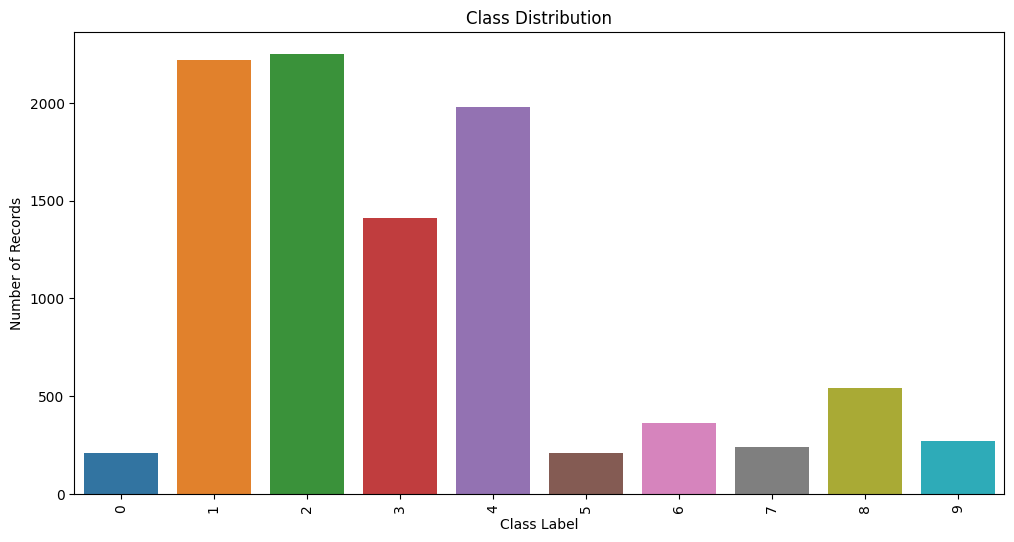

In [ ]:
#Histogram class per occurance
class_counts = classDataSet['0'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Records')
plt.xticks(rotation=90)
plt.show()

The samples (labeled data) are not balanced. Some classes are having more samples than others.

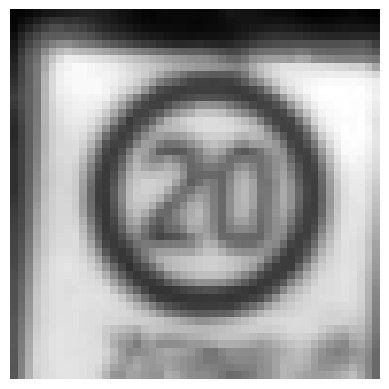

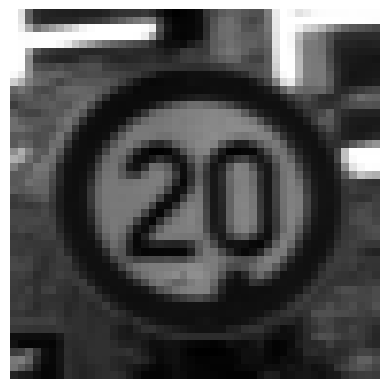

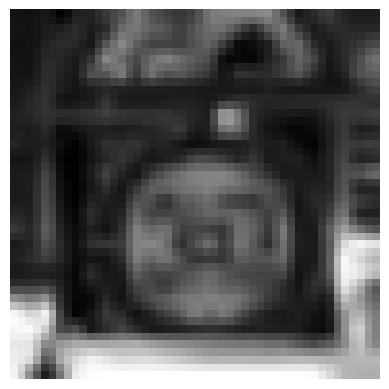

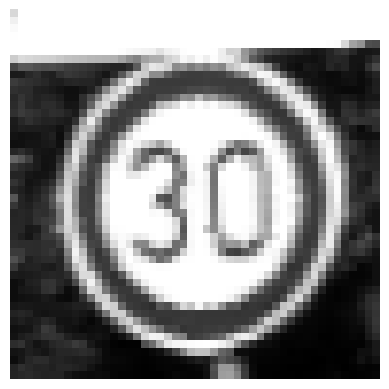

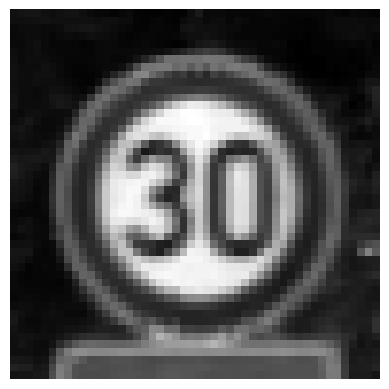

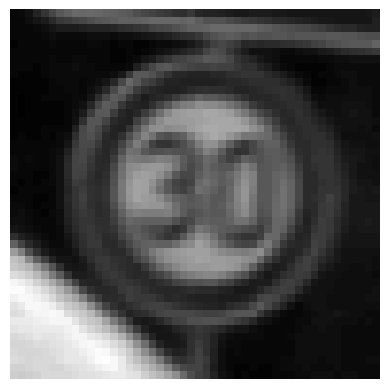

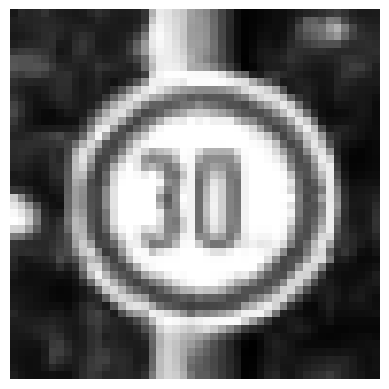

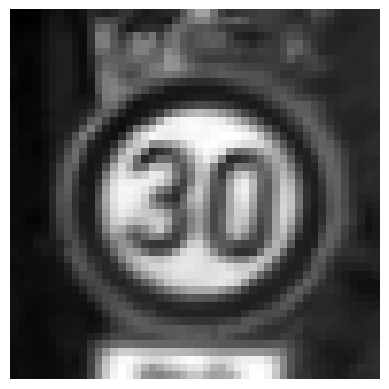

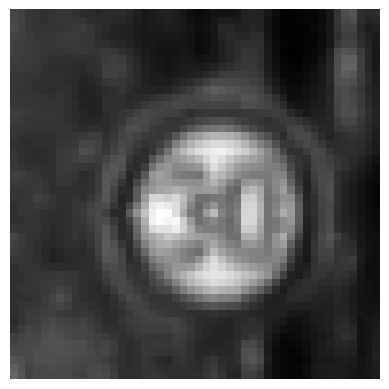

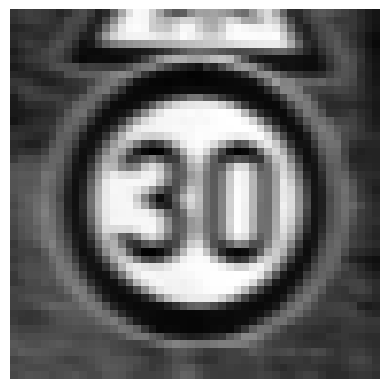

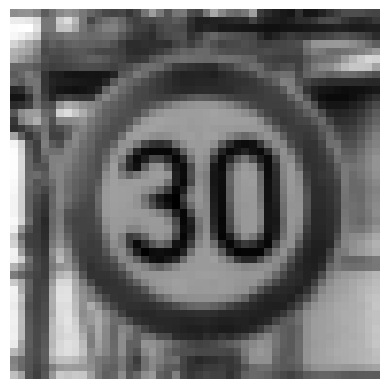

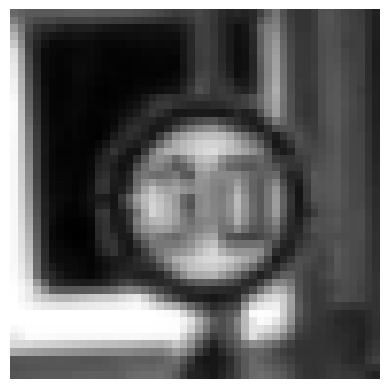

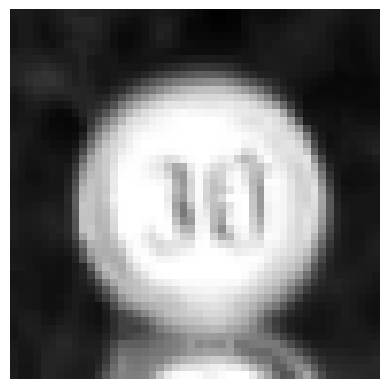

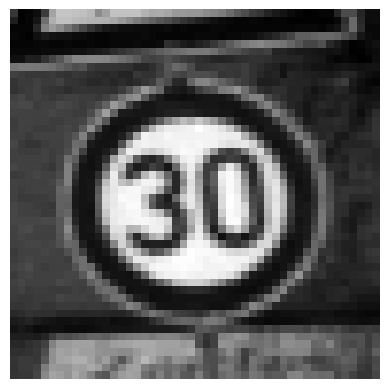

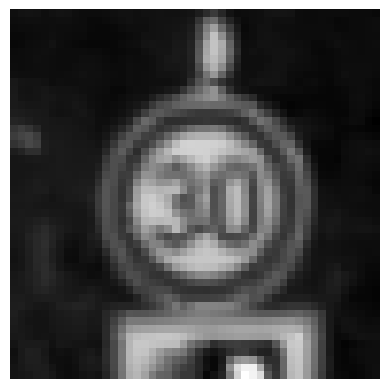

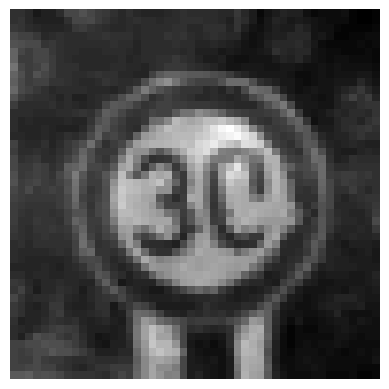

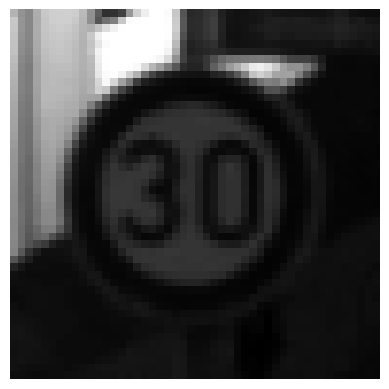

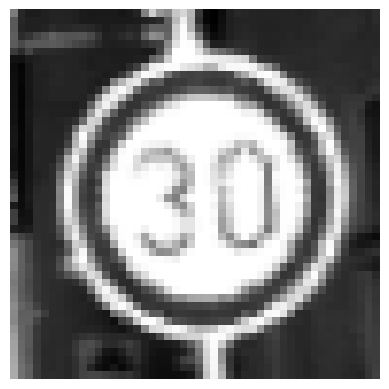

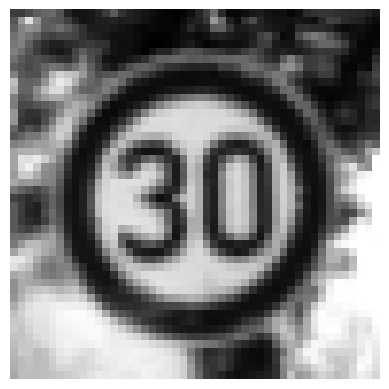

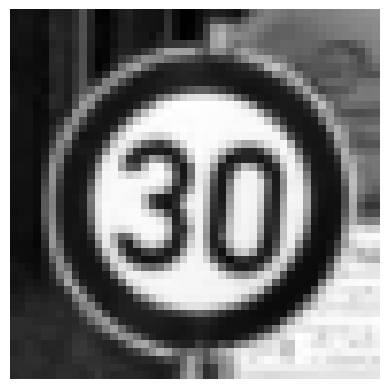

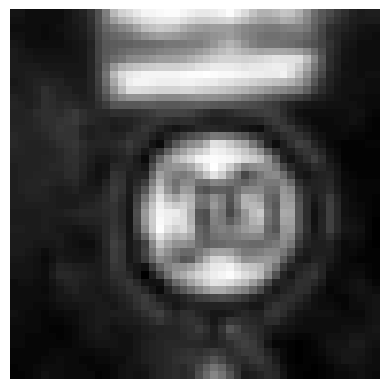

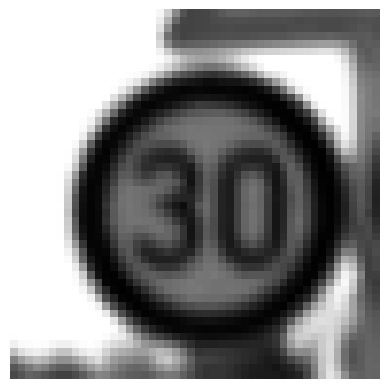

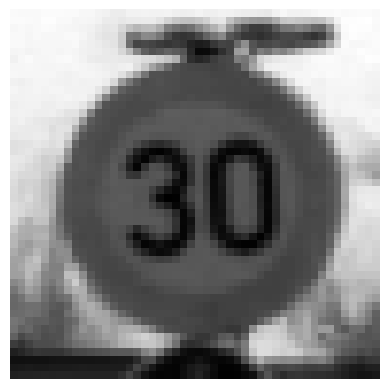

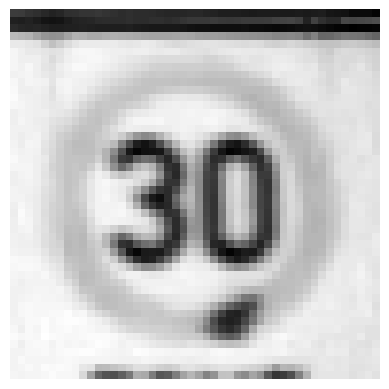

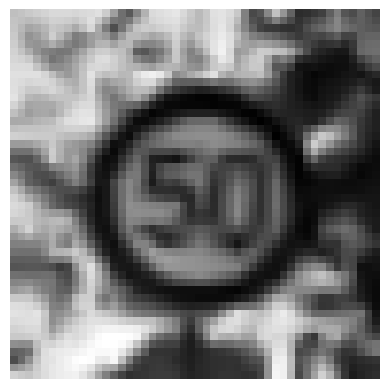

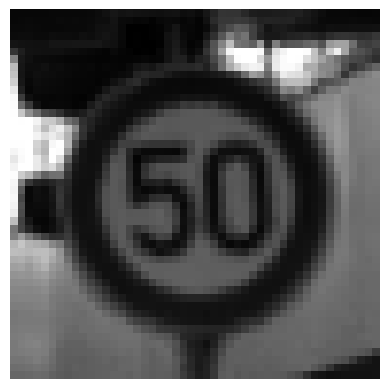

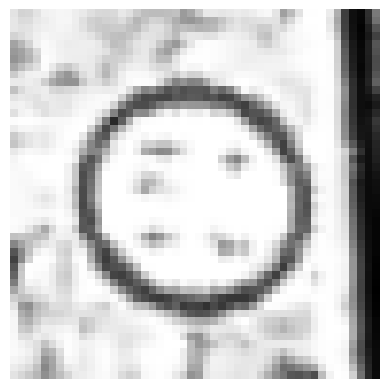

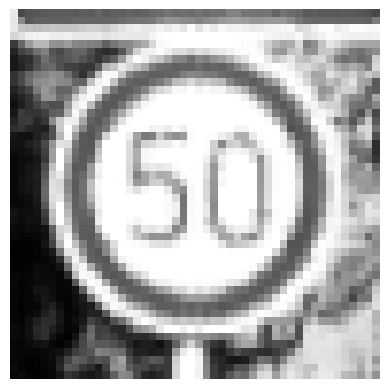

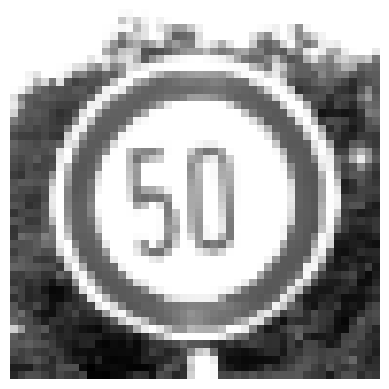

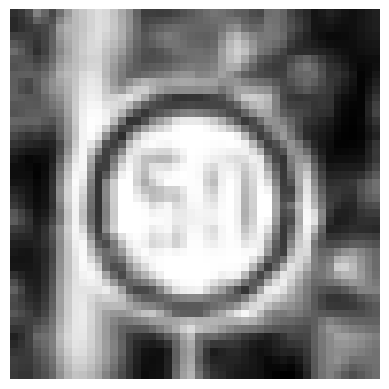

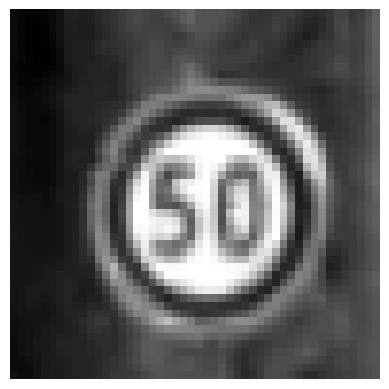

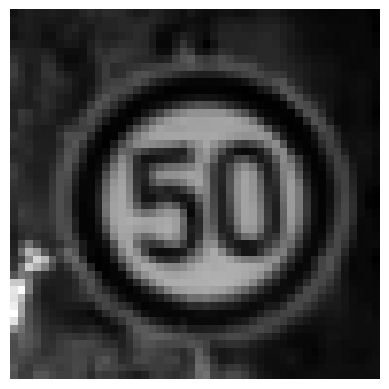

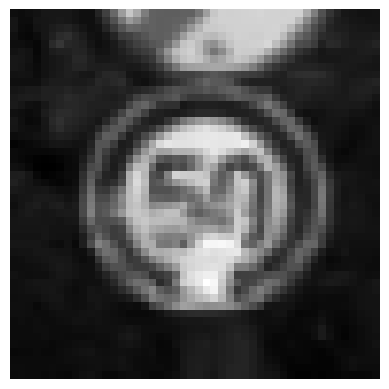

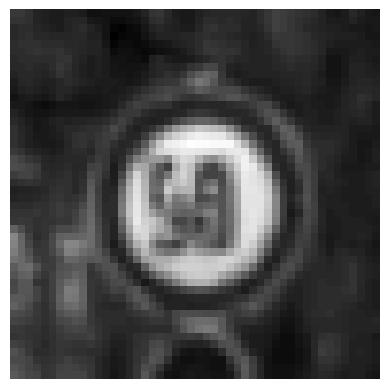

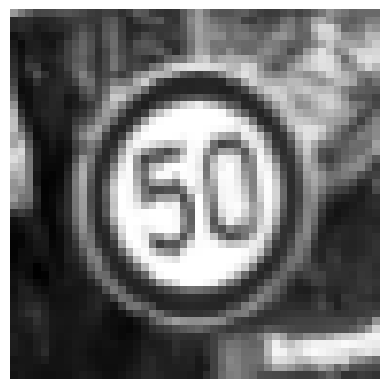

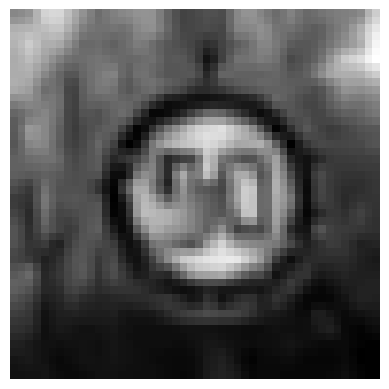

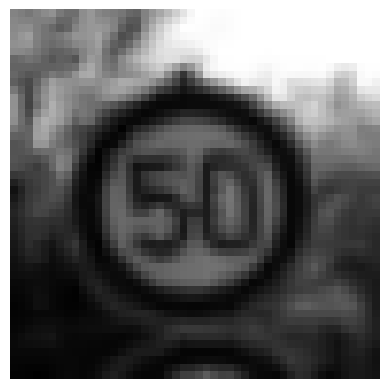

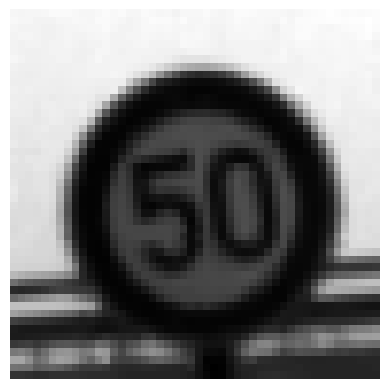

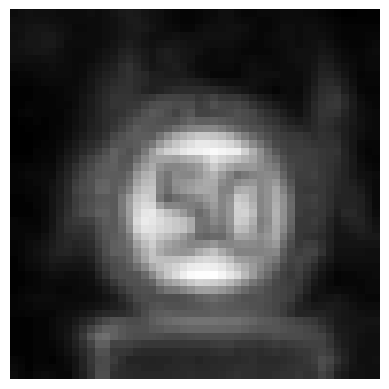

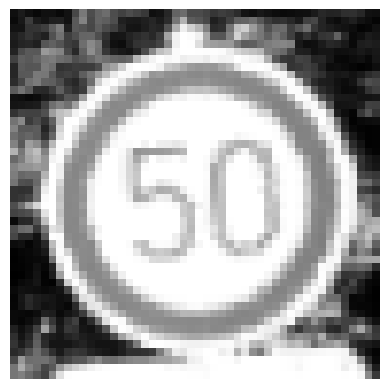

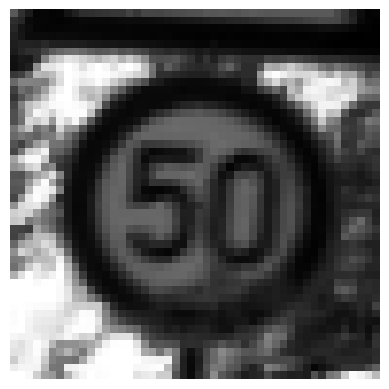

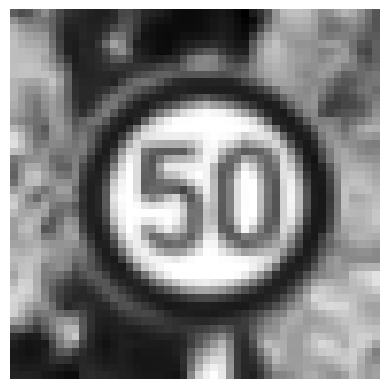

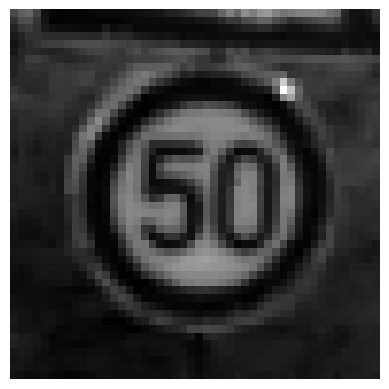

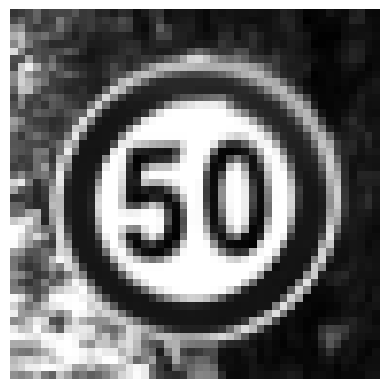

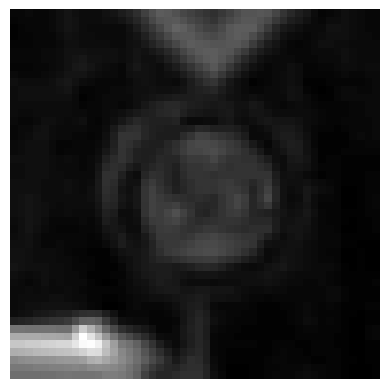

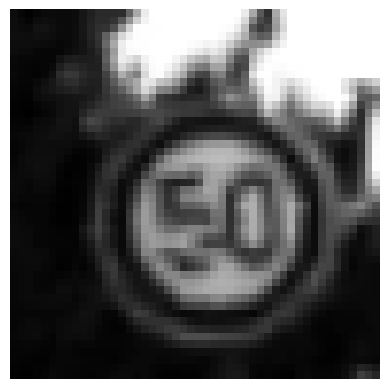

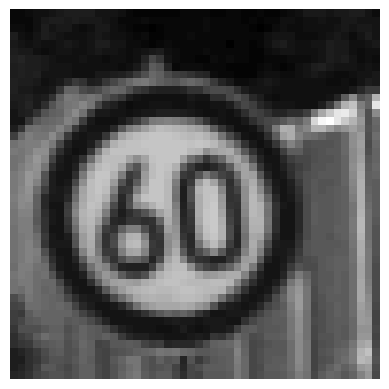

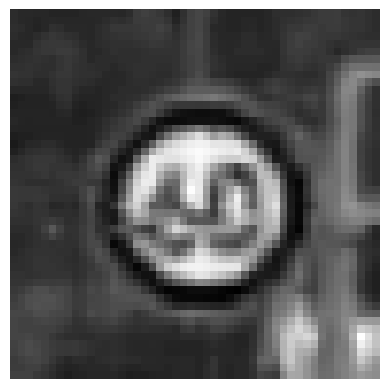

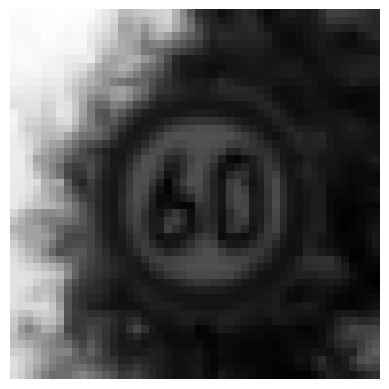

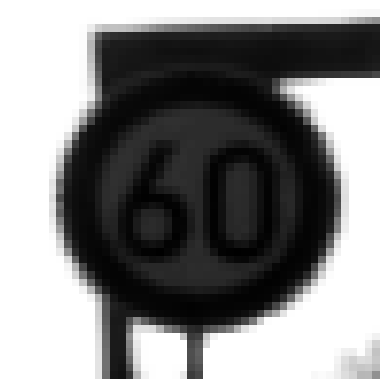

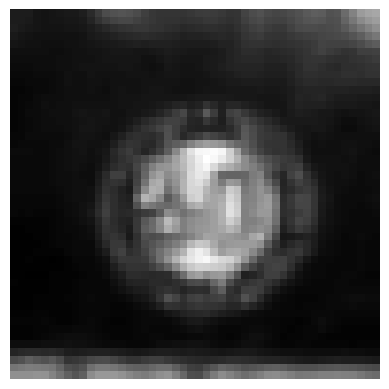

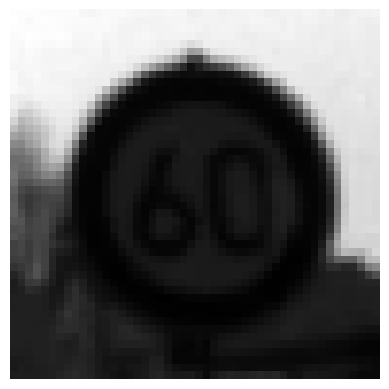

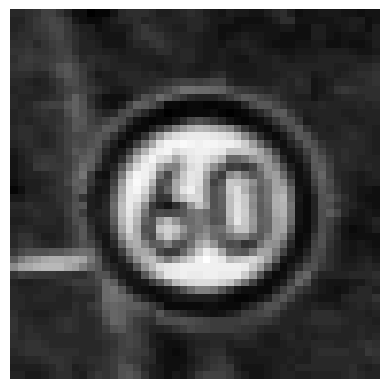

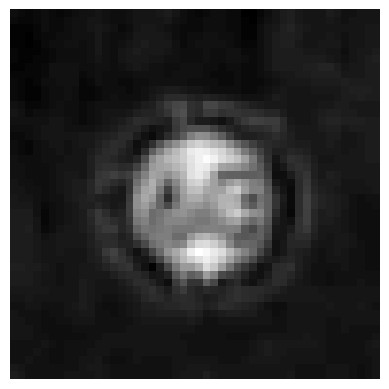

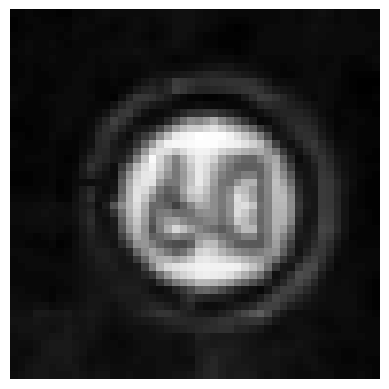

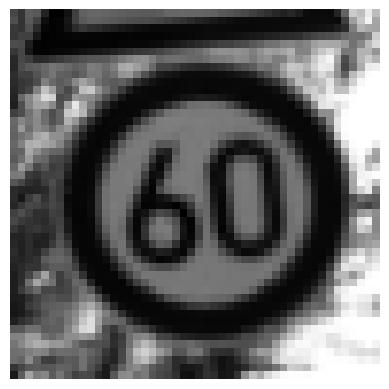

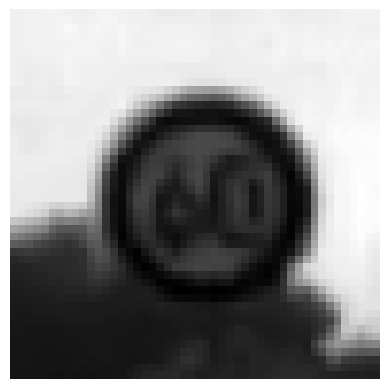

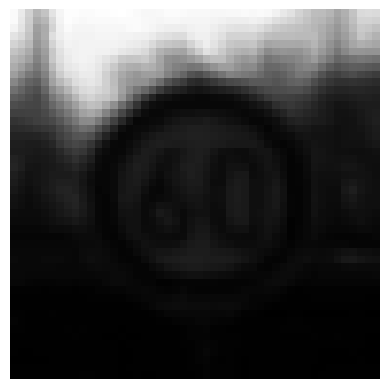

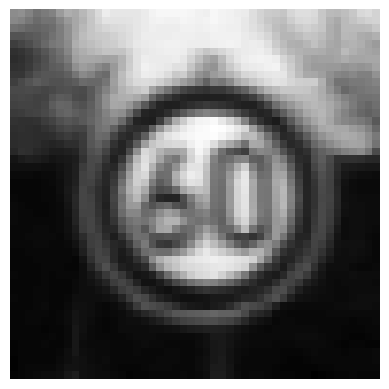

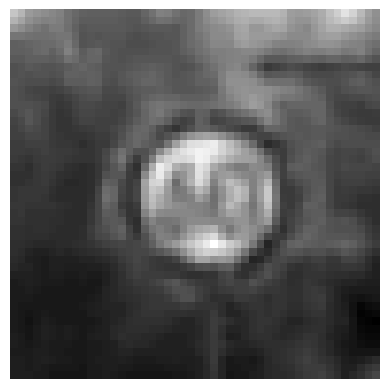

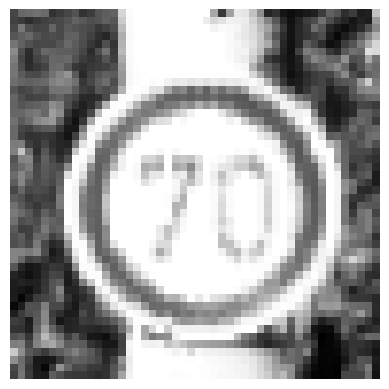

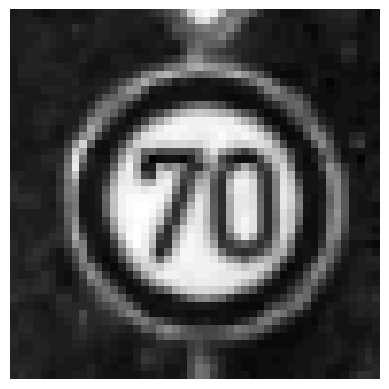

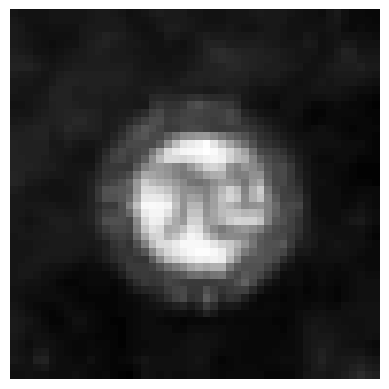

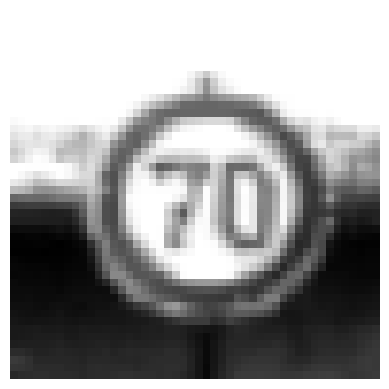

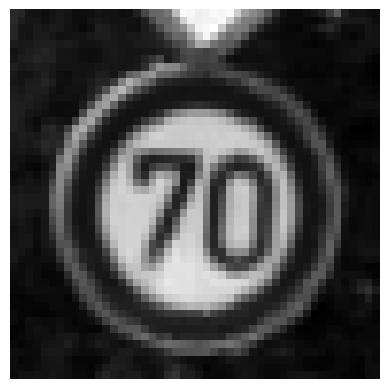

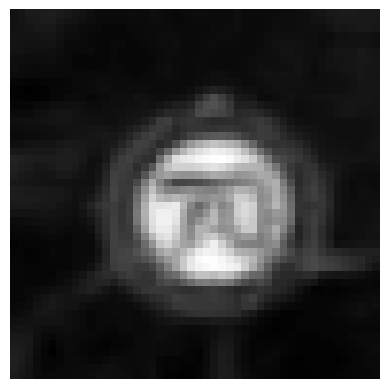

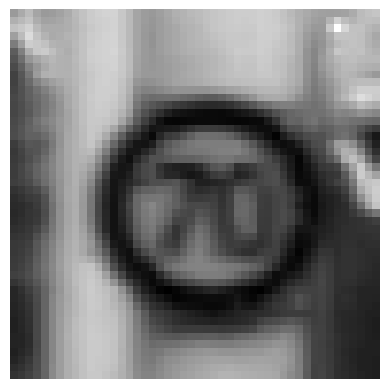

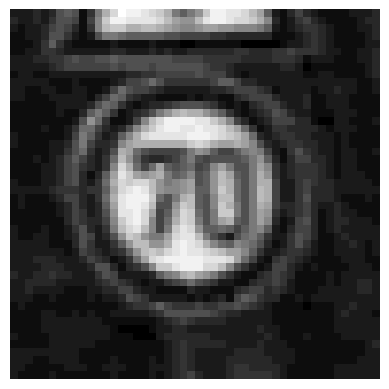

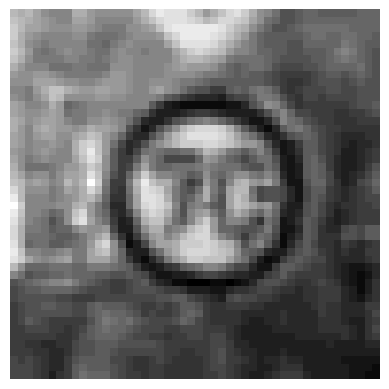

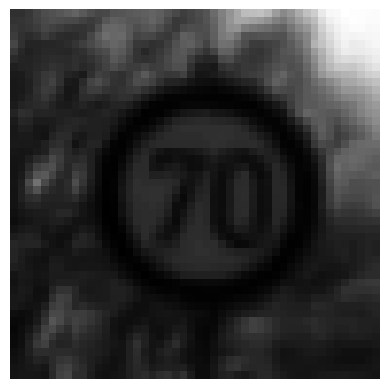

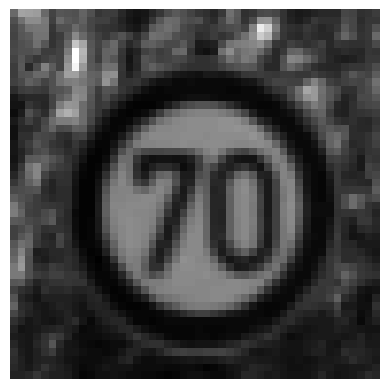

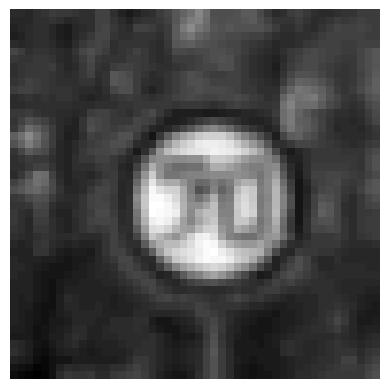

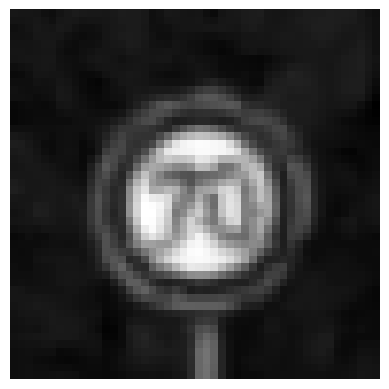

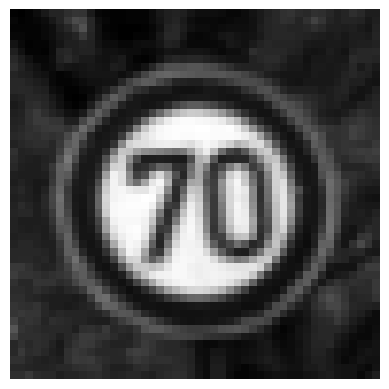

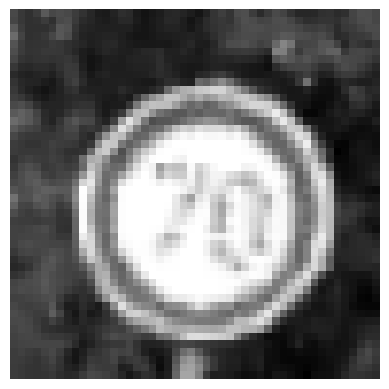

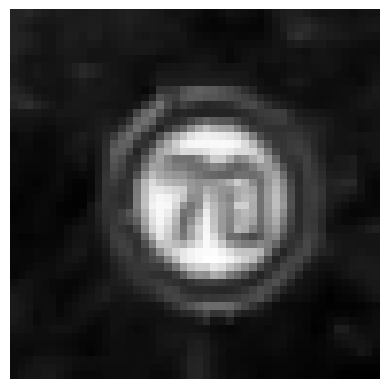

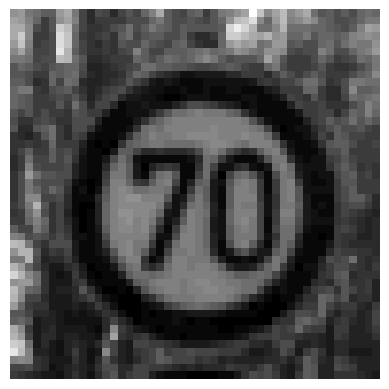

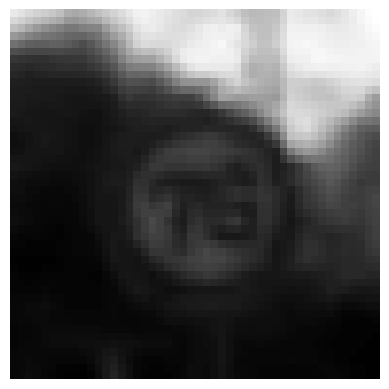

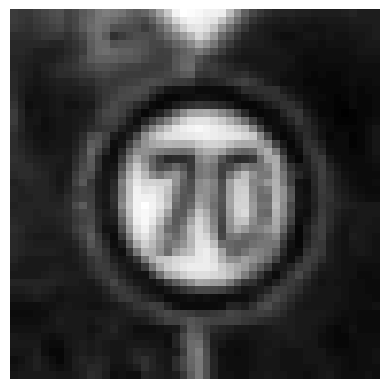

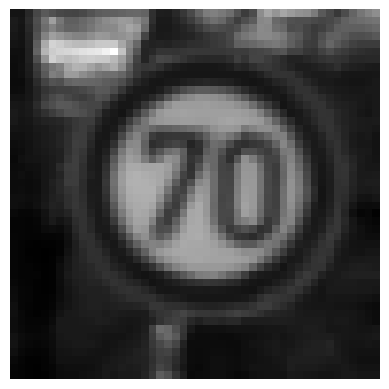

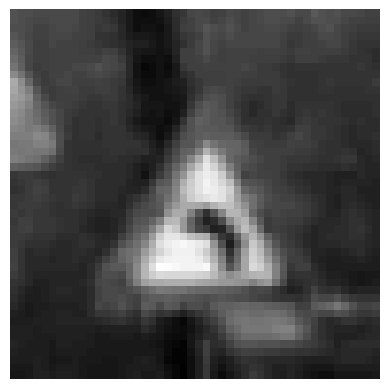

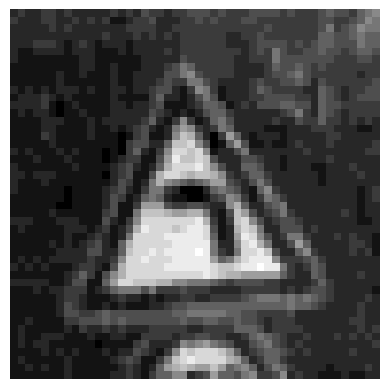

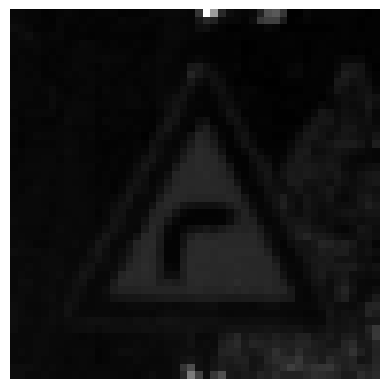

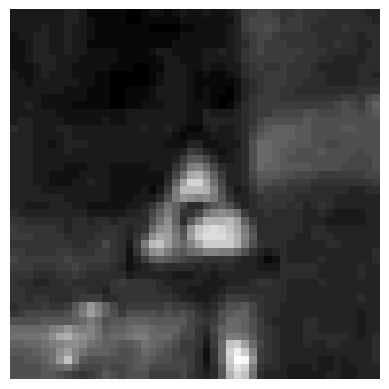

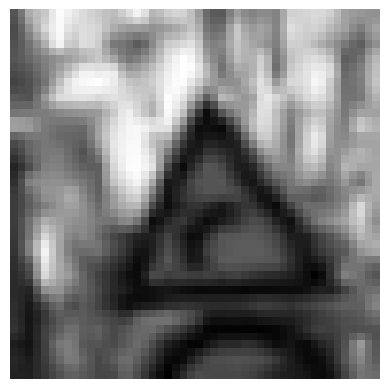

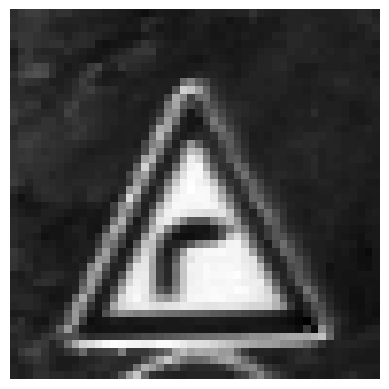

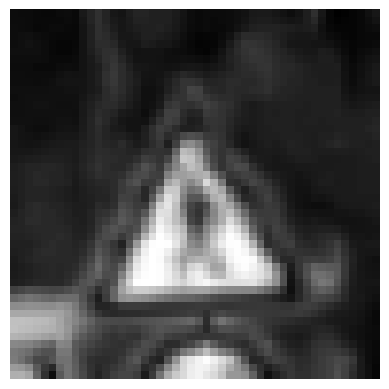

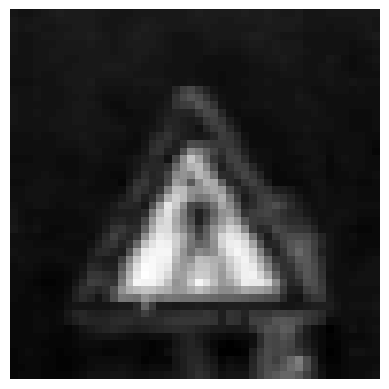

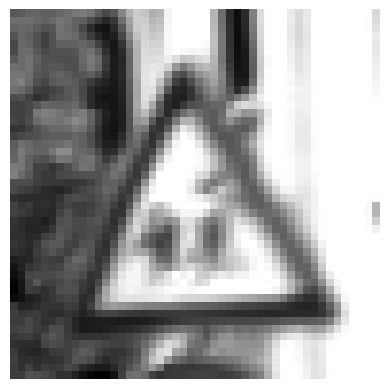

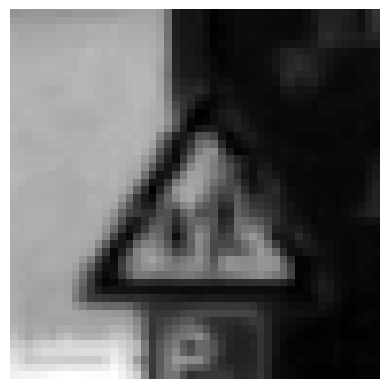

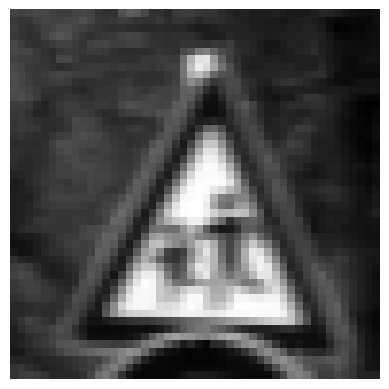

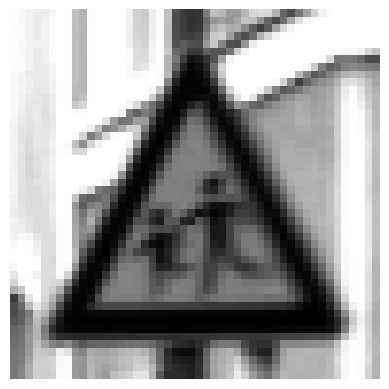

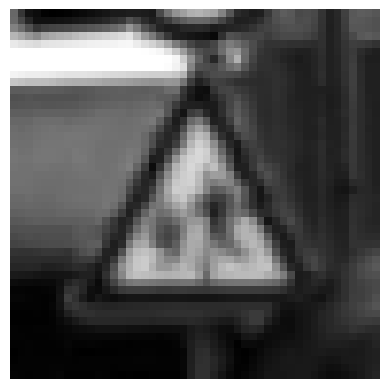

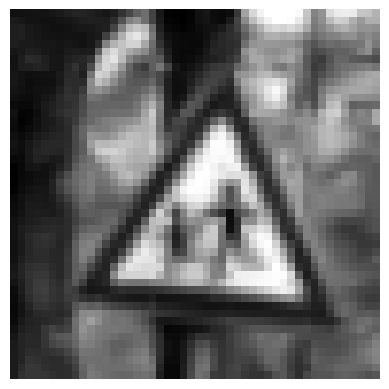

In [ ]:
#Plot a few images for better understanding
for index in range(1,95):
  oneImageData=trainDataSet.iloc[index*100]
  oneImageData_np = np.array(oneImageData)
  oneImageData_reshaped = oneImageData_np.reshape(48, 48)
  plt.imshow(oneImageData_reshaped, cmap='gray')
  plt.axis("off")
  plt.show()

Degraded samples with low quality. The samples are taken from different directions, distances and angles.  

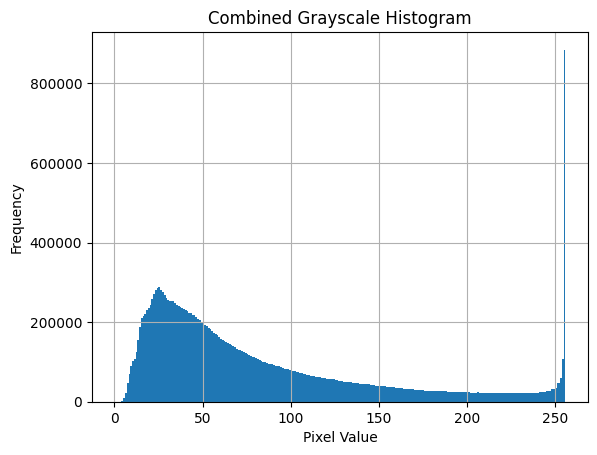

In [ ]:
#Create a histogram for brightness density (occurance of every value/pixel brightness)
combined_pixel_series = trainDataSet.stack()
histogram = combined_pixel_series.hist(bins=256, range=(0, 256))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Combined Grayscale Histogram')
plt.show()

Histogram of color (brightness) is showing more pixels on the darker side and spike above 250 (too bright)

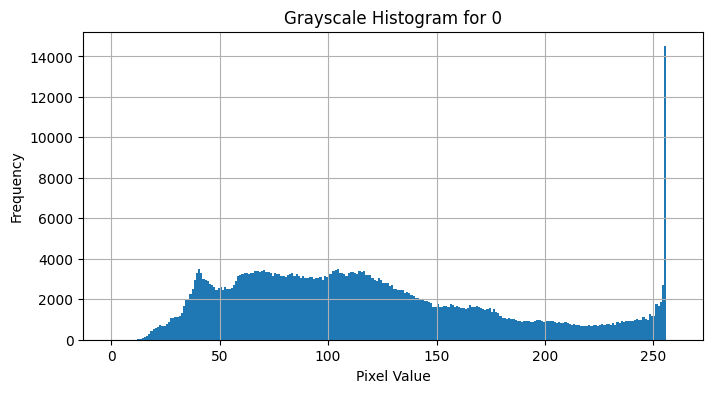

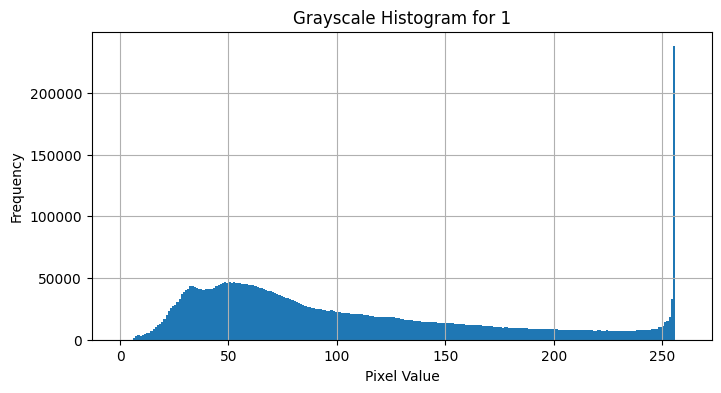

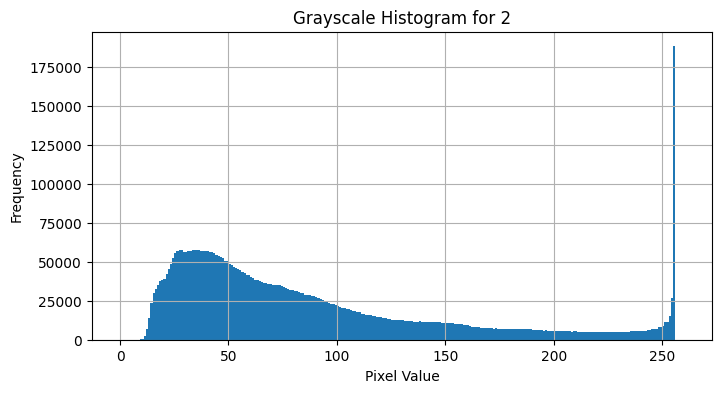

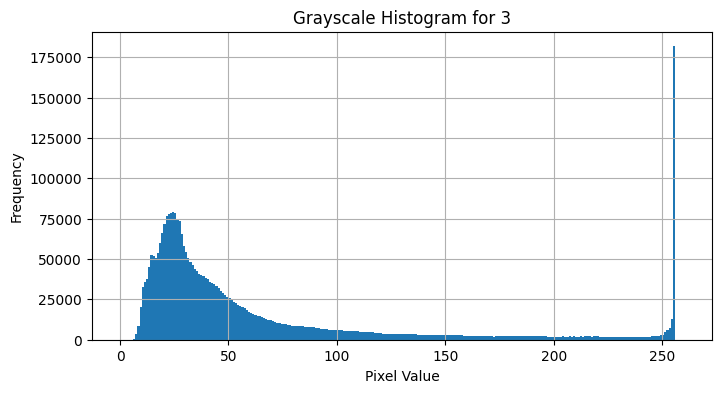

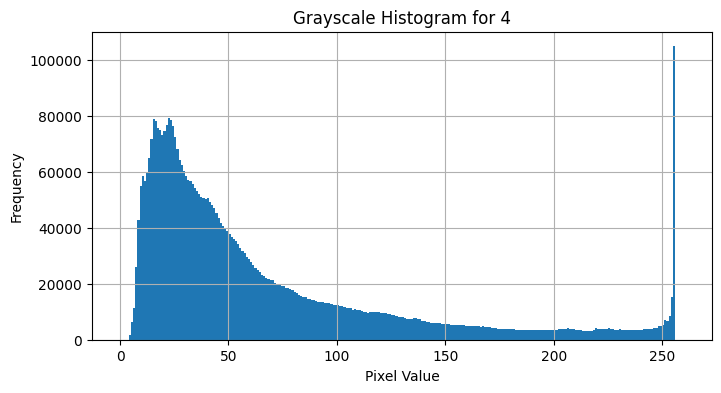

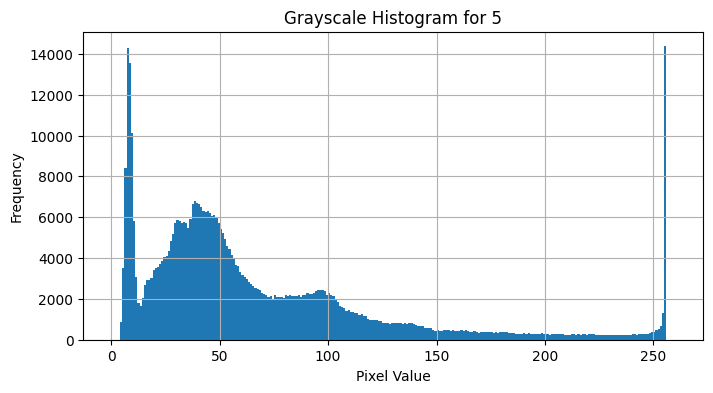

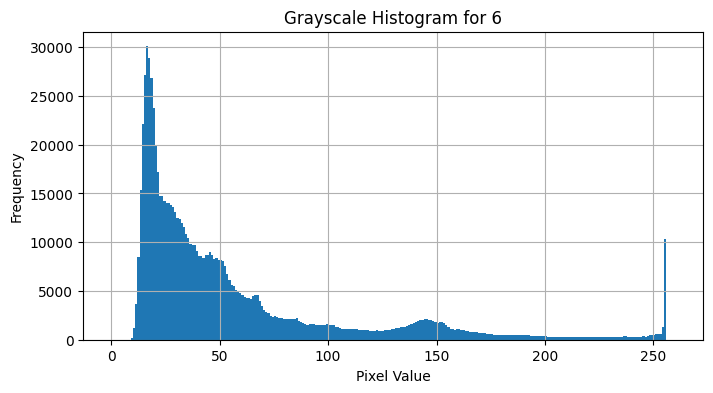

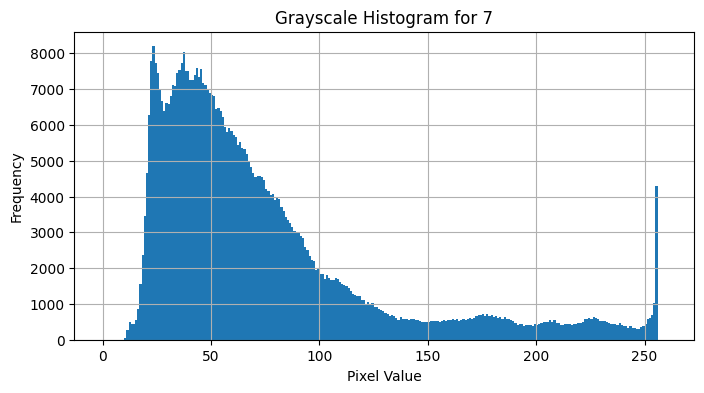

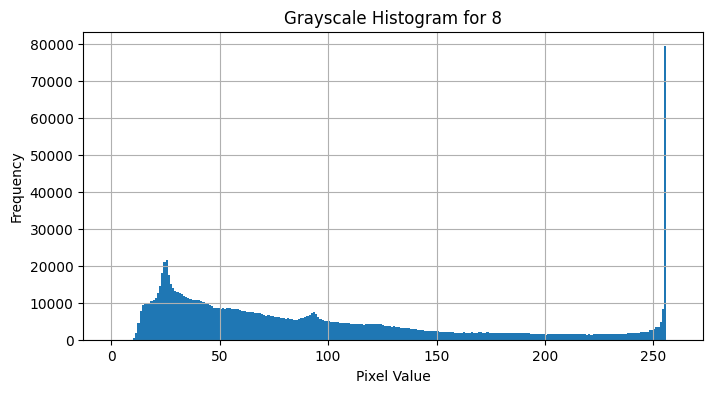

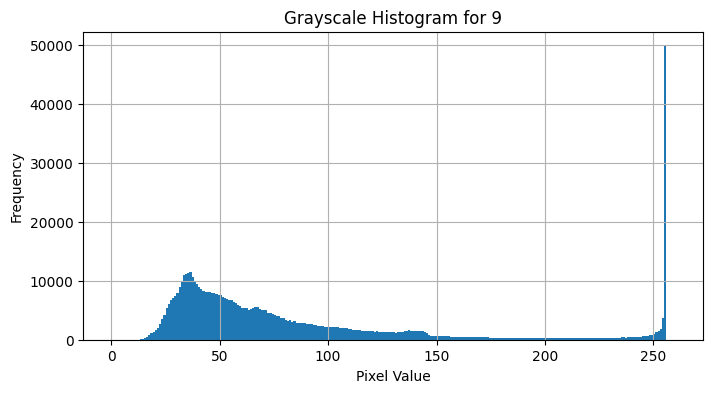

In [ ]:
# Histogram per class showing brightness
class_labels = classDataSet['0']

# Loop through each unique class label
for class_label in class_labels.unique():
    class_data = trainDataSet[class_labels == class_label]
    combined_pixel_series = class_data.stack()
    plt.figure(figsize=(8, 4))
    histogram = combined_pixel_series.hist(bins=260, range=(0, 260))
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(f'Grayscale Histogram for {class_label}')
    plt.show()

There is a good room to use this histogram for clasificaiton since is showing an interesting differentiation between different classes. However, this illustration is not showing the relevance of the location of the value which can be very interesting and provide better findings.

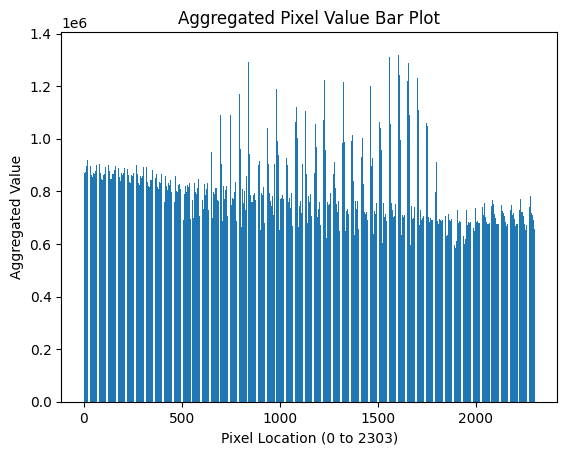

In [ ]:
#To show aggregated value of the location of each pixel (out of 2304, flat picture)
combined_pixel_df = trainDataSet.iloc[:, :-1]
aggregated_values = combined_pixel_df.sum()
plt.bar(range(2303), aggregated_values)
plt.xlabel('Pixel Location (0 to 2303)')
plt.ylabel('Aggregated Value')
plt.title('Aggregated Pixel Value Bar Plot')
plt.show()

Histogram is showing higher values on the center and less on the sides which is also can be an interesting event to capture and use it for classificaiton.

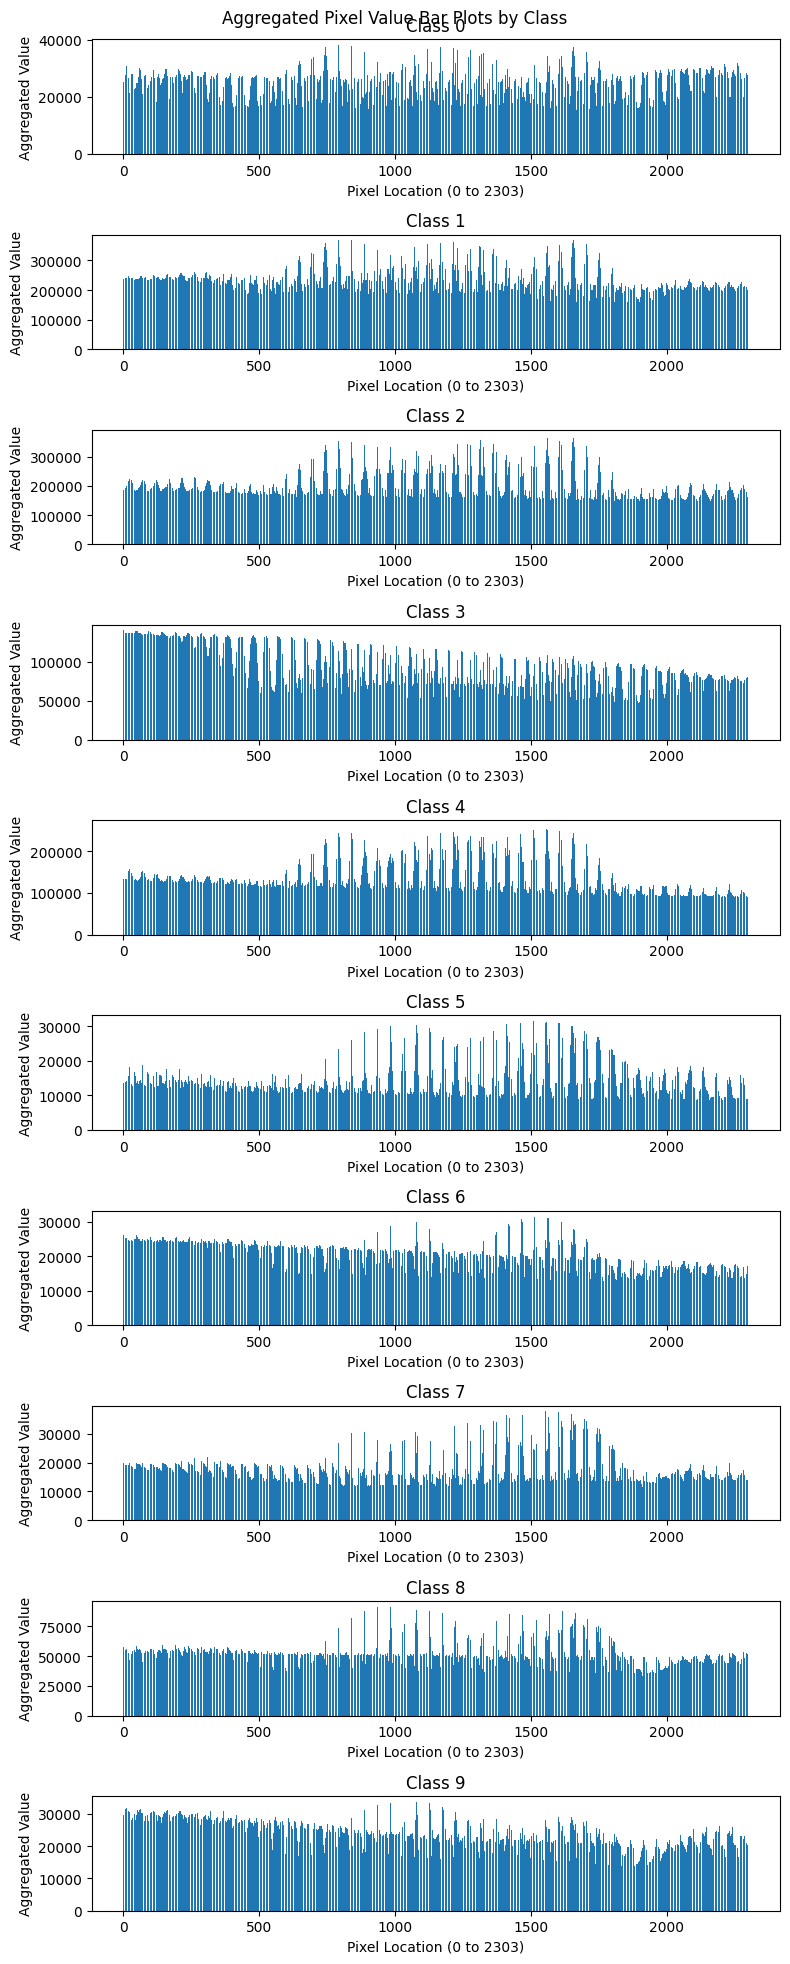

In [ ]:
# plotting a histogram per class showing the aggregated value against the location of a particular pixel
unique_class_labels = classDataSet['0'].unique()
fig, axes = plt.subplots(len(unique_class_labels), figsize=(8, 2 * len(unique_class_labels)))
fig.suptitle('Aggregated Pixel Value Bar Plots by Class')

for i, class_label in enumerate(unique_class_labels):
    filtered_trainDataSet = trainDataSet[classDataSet['0'] == class_label]
    combined_pixel_df = filtered_trainDataSet.iloc[:, :-1]
    aggregated_values = combined_pixel_df.sum()
    axes[i].bar(range(2303), aggregated_values)
    axes[i].set_title(f'Class {class_label}')
    axes[i].set_xlabel('Pixel Location (0 to 2303)')
    axes[i].set_ylabel('Aggregated Value')

plt.tight_layout()
plt.show()

Histogram based on pixel location and value (brihtness) is also interesting because different classes are showing different signitures that can be captured and used for classification

In [5]:
#Standarization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(trainDataSet)

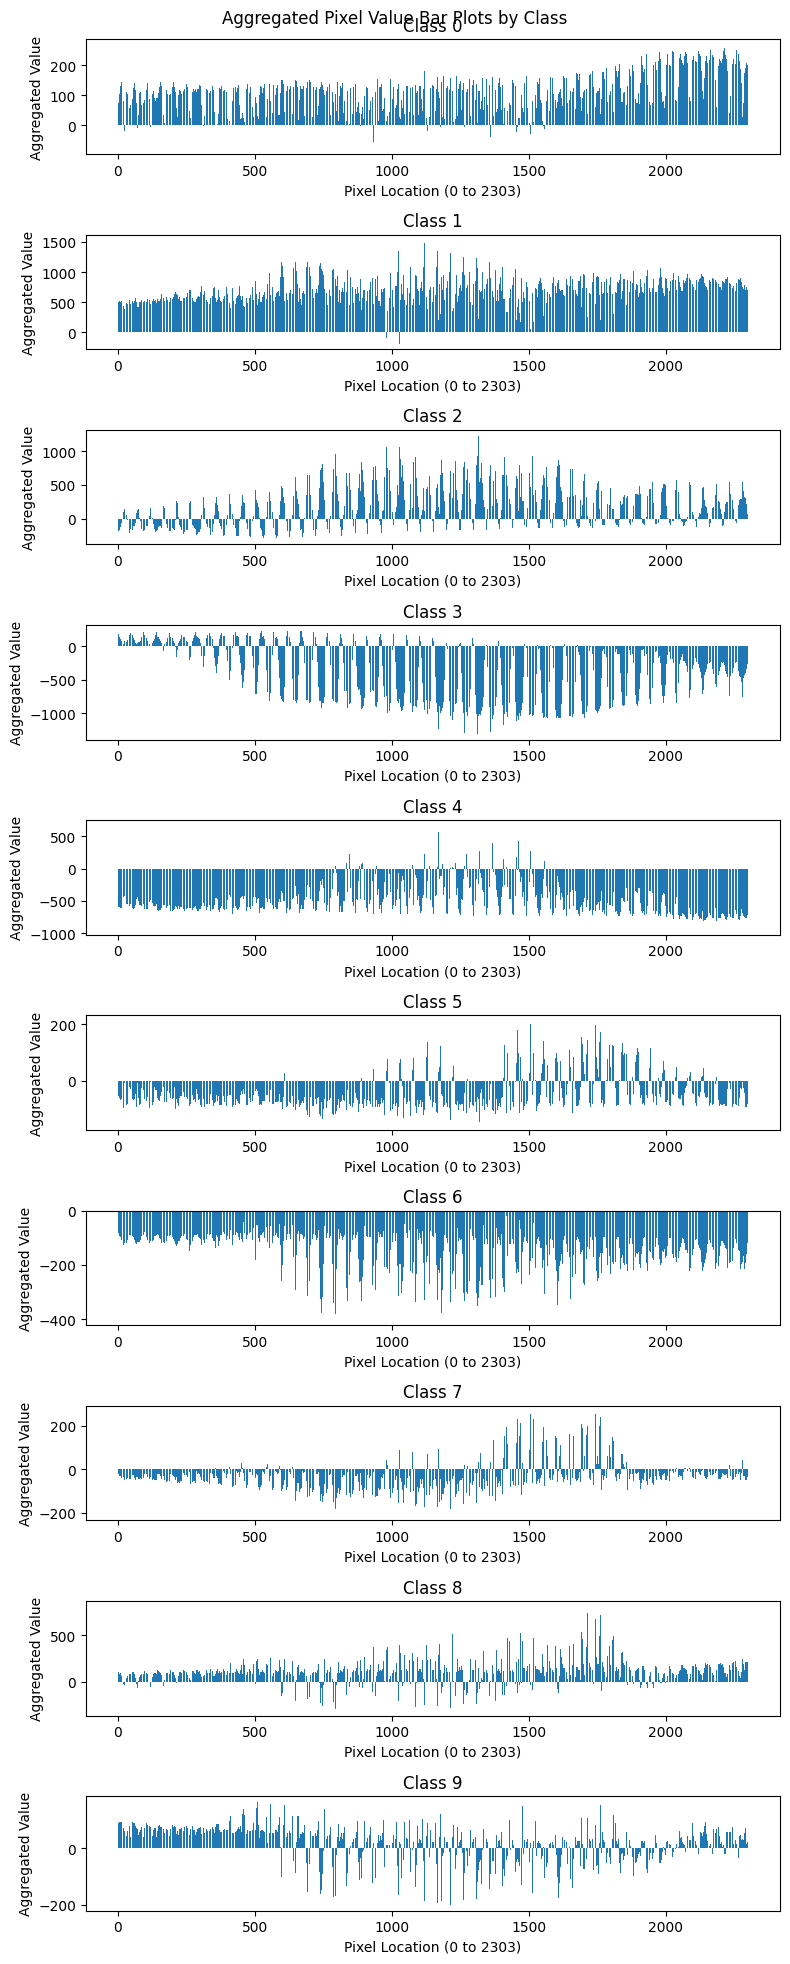

In [6]:
# Get unique class labels from classDataSet
unique_class_labels = classDataSet['0'].unique()

# Create a figure with multiple subplots
fig, axes = plt.subplots(len(unique_class_labels), figsize=(8, 2 * len(unique_class_labels)))
fig.suptitle('Aggregated Pixel Value Bar Plots by Class')

standardized_data=pd.DataFrame(standardized_data)

# Loop through each class in classDataSet and create a bar plot in a subplot
for i, class_label in enumerate(unique_class_labels):
    # Filter the records in trainDataSet based on the class information
    filtered_trainDataSet = standardized_data[classDataSet['0'] == class_label]

    # Combine all pixel columns into a single DataFrame
    combined_pixel_df = filtered_trainDataSet.iloc[:, :-1]

    # Sum the pixel values along each column (pixel location)
    aggregated_values = combined_pixel_df.sum()

    # Create a bar plot in the specified subplot
    axes[i].bar(range(2303), aggregated_values)
    axes[i].set_title(f'Class {class_label}')
    axes[i].set_xlabel('Pixel Location (0 to 2303)')
    axes[i].set_ylabel('Aggregated Value')

# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()

Histogram after applying standarization is also showing interesting differentiation

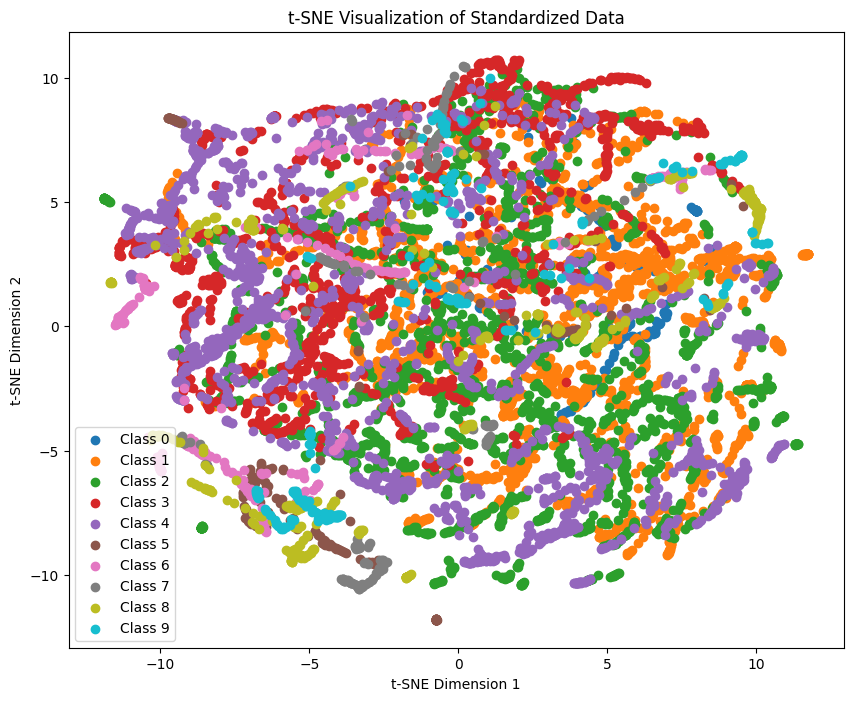

In [7]:
# Get unique class labels from classDataSet
unique_class_labels = classDataSet['0'].unique()

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Fit the t-SNE model to the standardized data
tsne_result = tsne.fit_transform(standardized_data)

# Create a scatter plot to visualize the t-SNE results
plt.figure(figsize=(10, 8))

# Loop through each class and plot points of that class with a different color
for class_label in unique_class_labels:
    class_indices = classDataSet['0'] == class_label
    plt.scatter(tsne_result[class_indices, 0], tsne_result[class_indices, 1], label=f'Class {class_label}')

plt.title('t-SNE Visualization of Standardized Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


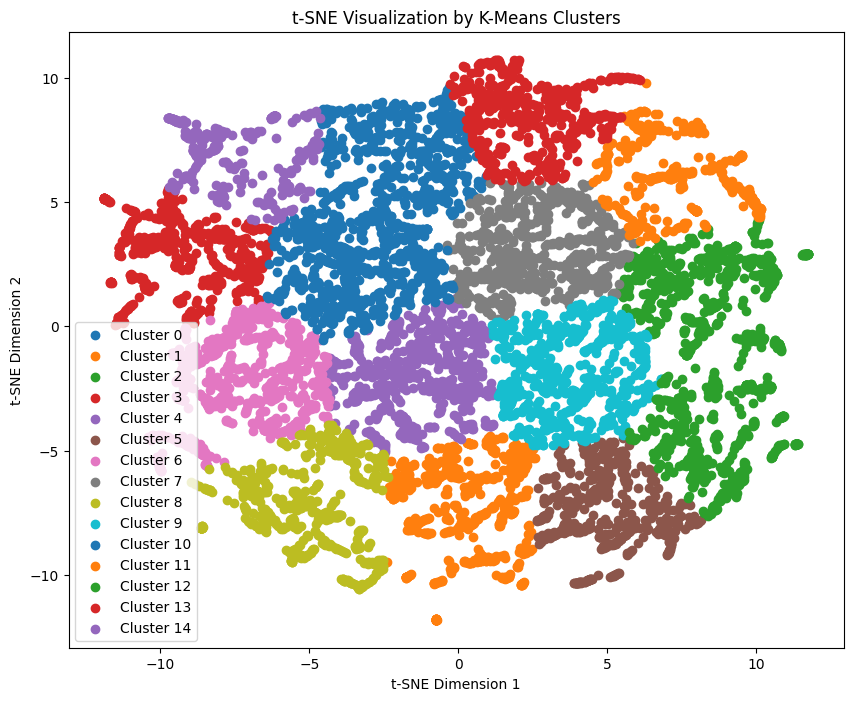

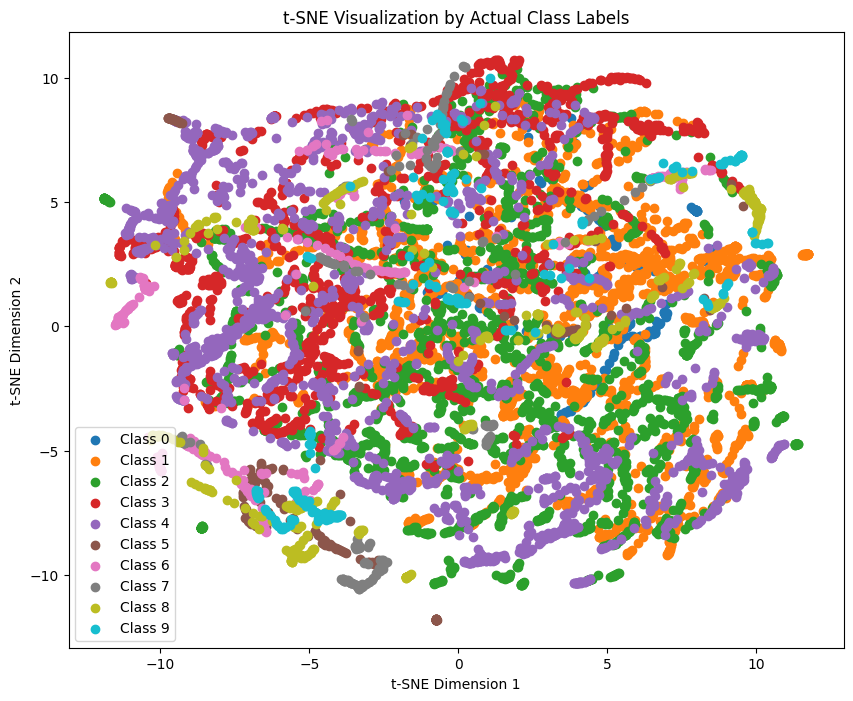

In [11]:

# Assuming you have already loaded and preprocessed your data into classDataSet and standardized_data

# Get unique class labels from classDataSet
unique_class_labels = classDataSet['0'].unique()

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Fit the t-SNE model to the standardized data
tsne_result = tsne.fit_transform(standardized_data)

# Perform k-means clustering and create a scatter plot based on clusters
num_clusters = 15  # You can adjust the number of clusters as needed

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_result)

# Create a scatter plot to visualize the t-SNE results based on k-means clusters
plt.figure(figsize=(10, 8))

# Loop through each cluster and plot points of that cluster with a different color
for cluster in range(num_clusters):
    cluster_indices = cluster_labels == cluster
    plt.scatter(tsne_result[cluster_indices, 0], tsne_result[cluster_indices, 1], label=f'Cluster {cluster}')

plt.title('t-SNE Visualization by K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Create a scatter plot to visualize the t-SNE results based on actual class labels
plt.figure(figsize=(10, 8))

# Loop through each class and plot points of that class with a different color
for class_label in unique_class_labels:
    class_indices = classDataSet['0'] == class_label
    plt.scatter(tsne_result[class_indices, 0], tsne_result[class_indices, 1], label=f'Class {class_label}')

plt.title('t-SNE Visualization by Actual Class Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


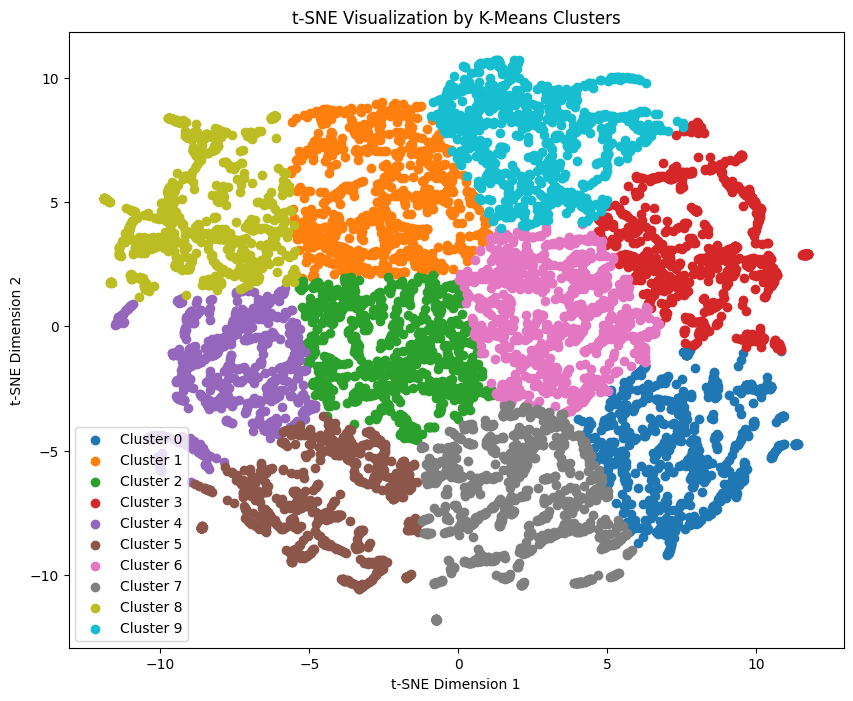

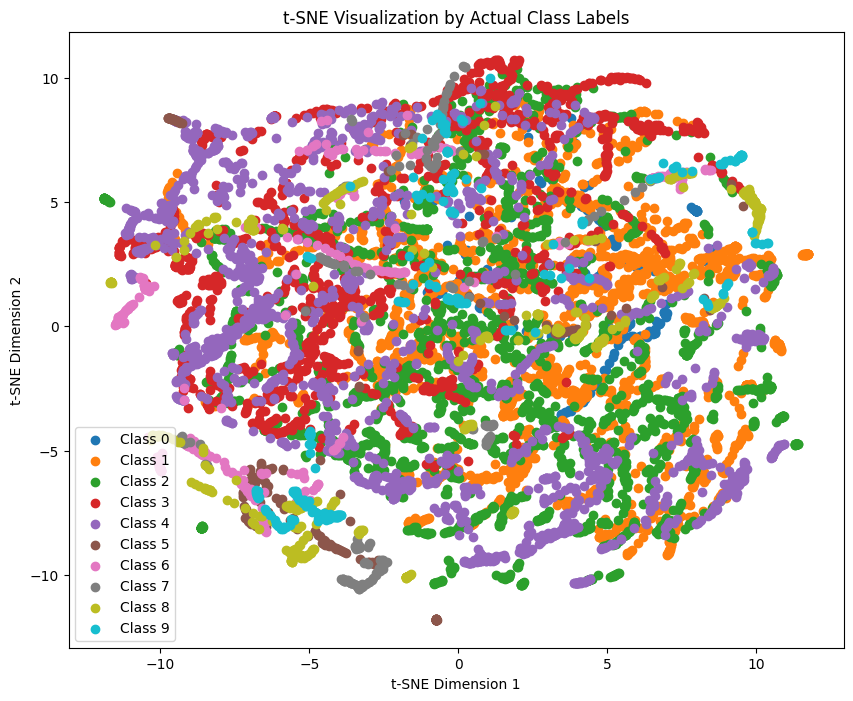

In [15]:

# Get unique class labels from classDataSet
unique_class_labels = classDataSet['0'].unique()

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# Fit the t-SNE model to the standardized data
tsne_result = tsne.fit_transform(standardized_data)

# Perform k-means clustering and create a scatter plot based on clusters
num_clusters = 10  # You can adjust the number of clusters as needed

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tsne_result)

# Create a scatter plot to visualize the t-SNE results based on k-means clusters
plt.figure(figsize=(10, 8))

# Loop through each cluster and plot points of that cluster with a different color
for cluster in range(num_clusters):
    cluster_indices = cluster_labels == cluster
    plt.scatter(tsne_result[cluster_indices, 0], tsne_result[cluster_indices, 1], label=f'Cluster {cluster}')

plt.title('t-SNE Visualization by K-Means Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# Create a scatter plot to visualize the t-SNE results based on actual class labels
plt.figure(figsize=(10, 8))

# Loop through each class and plot points of that class with a different color
for class_label in unique_class_labels:
    class_indices = classDataSet['0'] == class_label
    plt.scatter(tsne_result[class_indices, 0], tsne_result[class_indices, 1], label=f'Class {class_label}')

plt.title('t-SNE Visualization by Actual Class Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

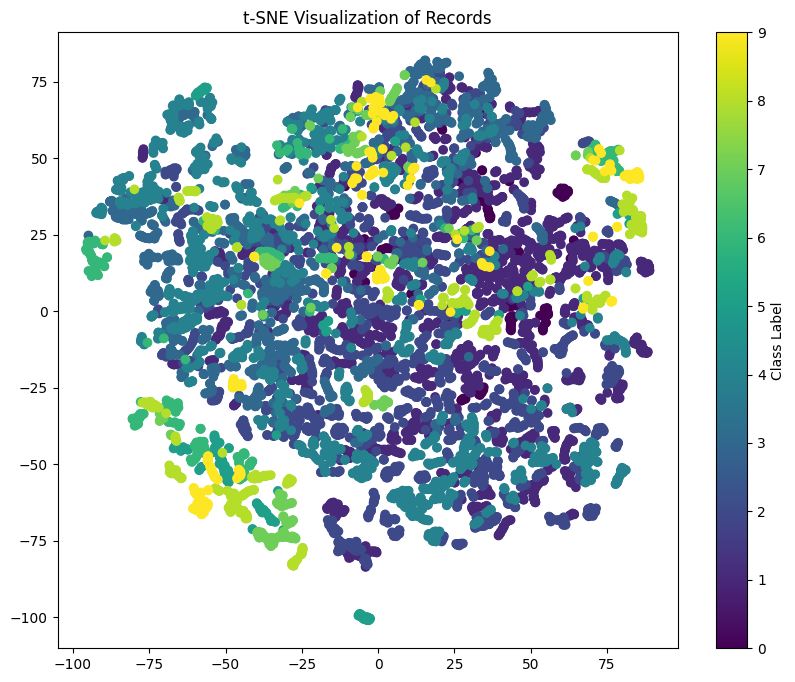

In [ ]:
# Using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(trainDataSet)

# Create a scatter plot to visualize records
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=classDataSet['0'], cmap='viridis')
plt.colorbar(scatter, label='Class Label')
plt.title('t-SNE Visualization of Records')
plt.show()

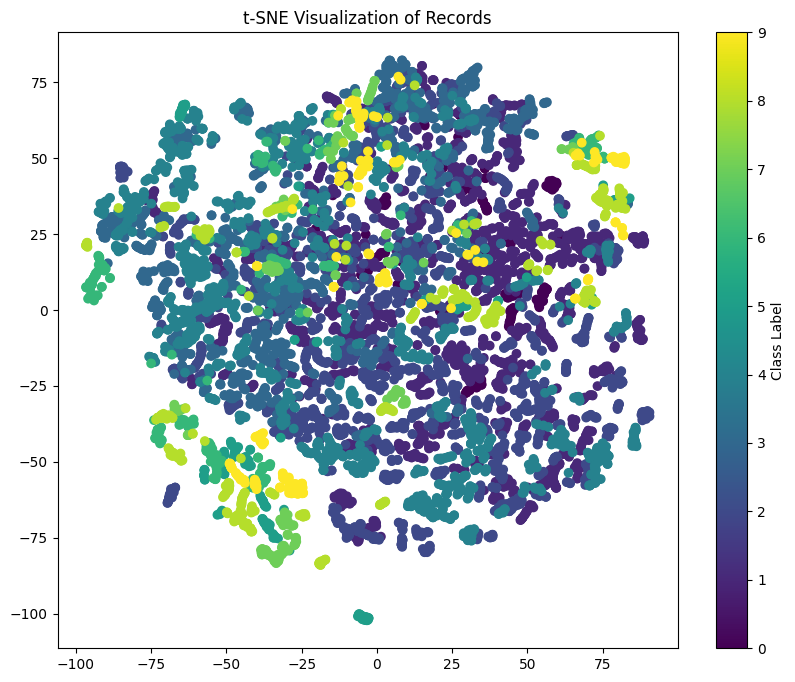

In [ ]:
# Using t-SNE
scaler = StandardScaler()
standardized_data = scaler.fit_transform(trainDataSet)
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(standardized_data)

# Create a scatter plot to visualize records
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=classDataSet['0'], cmap='viridis')
plt.colorbar(scatter, label='Class Label')
plt.title('t-SNE Visualization of Records')
plt.show()

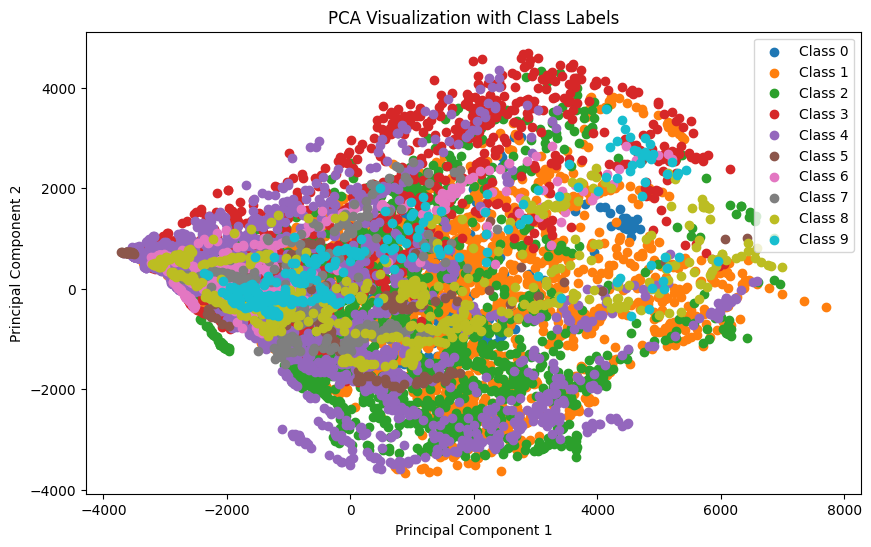

In [18]:

# Number of PCA components (adjust as needed)
n_components = 2

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
pca_results = pca.fit_transform(trainDataSet)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(n_components)])

# Combine the PCA results with the class labels
pca_df_with_labels = pd.concat([pca_df, classDataSet["0"]], axis=1)

# Visualize the PCA results with class information
plt.figure(figsize=(10, 6))
classes = pca_df_with_labels["0"].unique()
for class_label in classes:
    subset = pca_df_with_labels[pca_df_with_labels["0"] == class_label]
    plt.scatter(subset["PC1"], subset["PC2"], label=f'Class {class_label}')

plt.title('PCA Visualization with Class Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


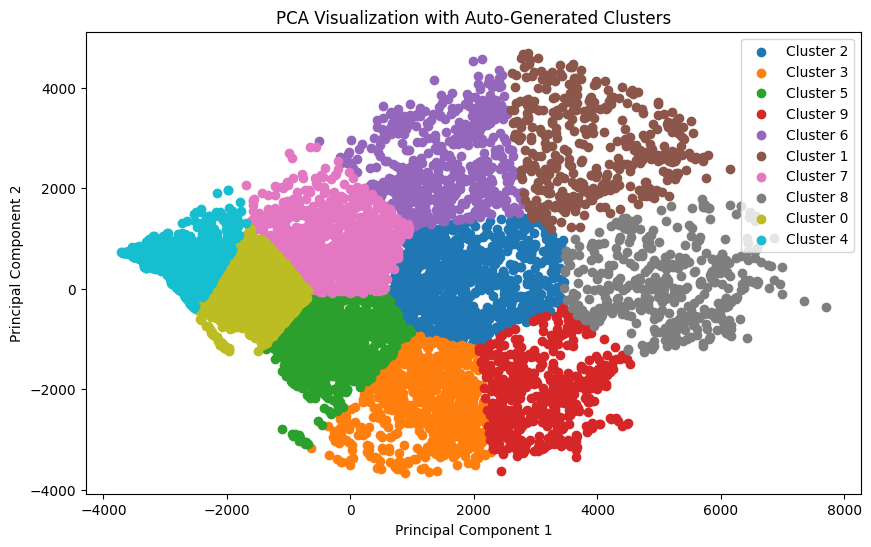

In [20]:
# Number of clusters (you need to specify the desired number)
n_clusters = 10

# Create a K-Means instance and fit it to your PCA results
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(pca_df)

# Add the cluster labels to your PCA DataFrame
pca_df_with_labels = pd.concat([pca_df, pd.Series(cluster_labels, name='cluster')], axis=1)

# Visualize based on clusters
plt.figure(figsize=(10, 6))
clusters = pca_df_with_labels['cluster'].unique()
for cluster_label in clusters:
    subset = pca_df_with_labels[pca_df_with_labels['cluster'] == cluster_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster_label}')

plt.title('PCA Visualization with Auto-Generated Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

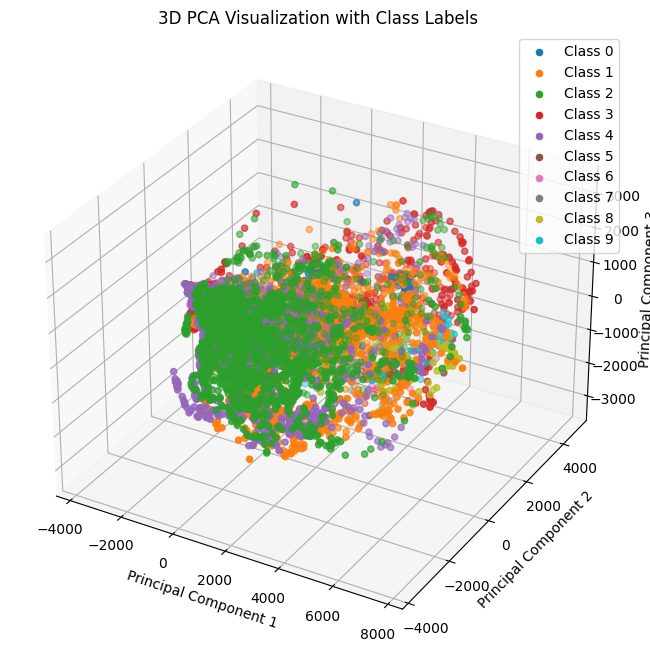

In [ ]:
# Number of PCA components (adjust as needed)
n_components = 3  # Use 3 components for 3D projection

# Create a PCA instance
pca = PCA(n_components=n_components)

# Fit and transform the data using PCA
pca_results = pca.fit_transform(trainDataSet)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(n_components)])

# Combine the PCA results with the class labels
pca_df_with_labels = pd.concat([pca_df, classDataSet["0"]], axis=1)

# Visualize the PCA results in 3D with class information
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

classes = pca_df_with_labels["0"].unique()
for class_label in classes:
    subset = pca_df_with_labels[pca_df_with_labels["0"] == class_label]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], label=f'Class {class_label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.title('3D PCA Visualization with Class Labels')
plt.show()


Different clustering techniques didnt show a clear differentiation between classes. Clustering might not help directly in the classification process.

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9690 samples in 0.001s...
[t-SNE] Computed neighbors for 9690 samples in 0.899s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9690
[t-SNE] Computed conditional probabilities for sample 2000 / 9690
[t-SNE] Computed conditional probabilities for sample 3000 / 9690
[t-SNE] Computed conditional probabilities for sample 4000 / 9690
[t-SNE] Computed conditional probabilities for sample 5000 / 9690
[t-SNE] Computed conditional probabilities for sample 6000 / 9690
[t-SNE] Computed conditional probabilities for sample 7000 / 9690
[t-SNE] Computed conditional probabilities for sample 8000 / 9690
[t-SNE] Computed conditional probabilities for sample 9000 / 9690
[t-SNE] Computed conditional probabilities for sample 9690 / 9690
[t-SNE] Mean sigma: 369.832917
[t-SNE] Computed conditional probabilities in 1.450s
[t-SNE] Iteration 50: error = 74.2336426, gradient norm = 0.0076978 (50 iterations in 5.253s)
[t-SNE] Iteration 10

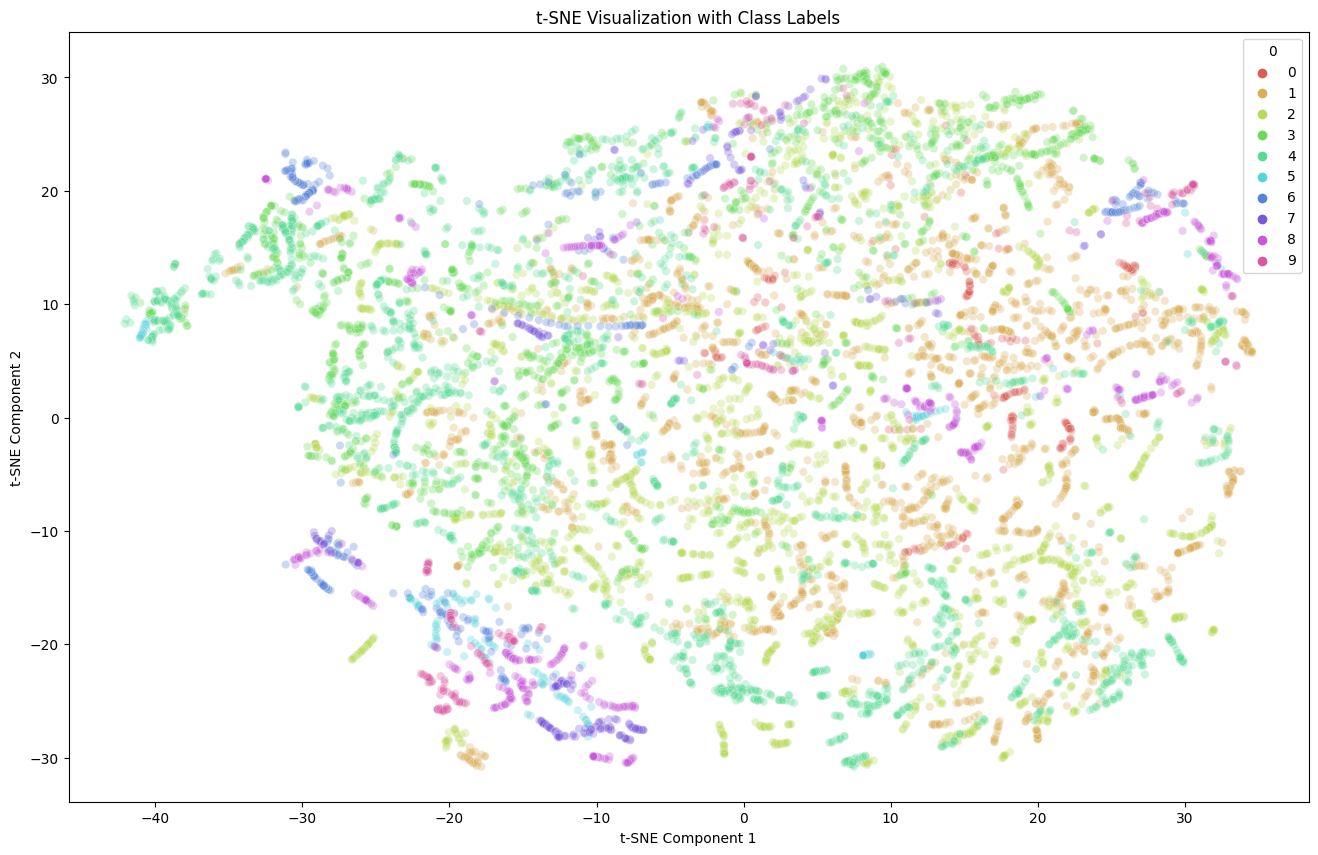

In [ ]:
# Number of PCA components (adjust as needed)
n_components_pca = 50  # Adjust as needed

# Create a PCA instance and fit-transform the data
pca = PCA(n_components=n_components_pca)
pca_result = pca.fit_transform(trainDataSet)

# Number of t-SNE components (typically 2 for visualization)
n_components_tsne = 2  # Use 2 components for 2D visualization

# Create a t-SNE instance and fit-transform the PCA results
tsne = TSNE(n_components=n_components_tsne, verbose=3, perplexity=100, n_iter=500)
tsne_results = tsne.fit_transform(pca_result)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=[f't-SNE{i+1}' for i in range(n_components_tsne)])

# Combine the t-SNE results with the class labels (replace "0" with your class label column name)
tsne_df_with_labels = pd.concat([tsne_df, classDataSet["0"]], axis=1)

# Visualize the t-SNE results with class information
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="t-SNE1", y="t-SNE2",
    hue="0",  # Replace "0" with your class label column name
    data=tsne_df_with_labels,
    palette=sns.color_palette("hls", len(classDataSet["0"].unique())),
    legend="full",
    alpha=0.3
)
plt.title('t-SNE Visualization with Class Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9690 samples in 0.531s...
[t-SNE] Computed neighbors for 9690 samples in 19.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9690
[t-SNE] Computed conditional probabilities for sample 2000 / 9690
[t-SNE] Computed conditional probabilities for sample 3000 / 9690
[t-SNE] Computed conditional probabilities for sample 4000 / 9690
[t-SNE] Computed conditional probabilities for sample 5000 / 9690
[t-SNE] Computed conditional probabilities for sample 6000 / 9690
[t-SNE] Computed conditional probabilities for sample 7000 / 9690
[t-SNE] Computed conditional probabilities for sample 8000 / 9690
[t-SNE] Computed conditional probabilities for sample 9000 / 9690
[t-SNE] Computed conditional probabilities for sample 9690 / 9690
[t-SNE] Mean sigma: 403.314403
[t-SNE] Computed conditional probabilities in 1.842s
[t-SNE] Iteration 50: error = 74.3867950, gradient norm = 0.0082479 (50 iterations in 11.771s)
[t-SNE] Iteration 

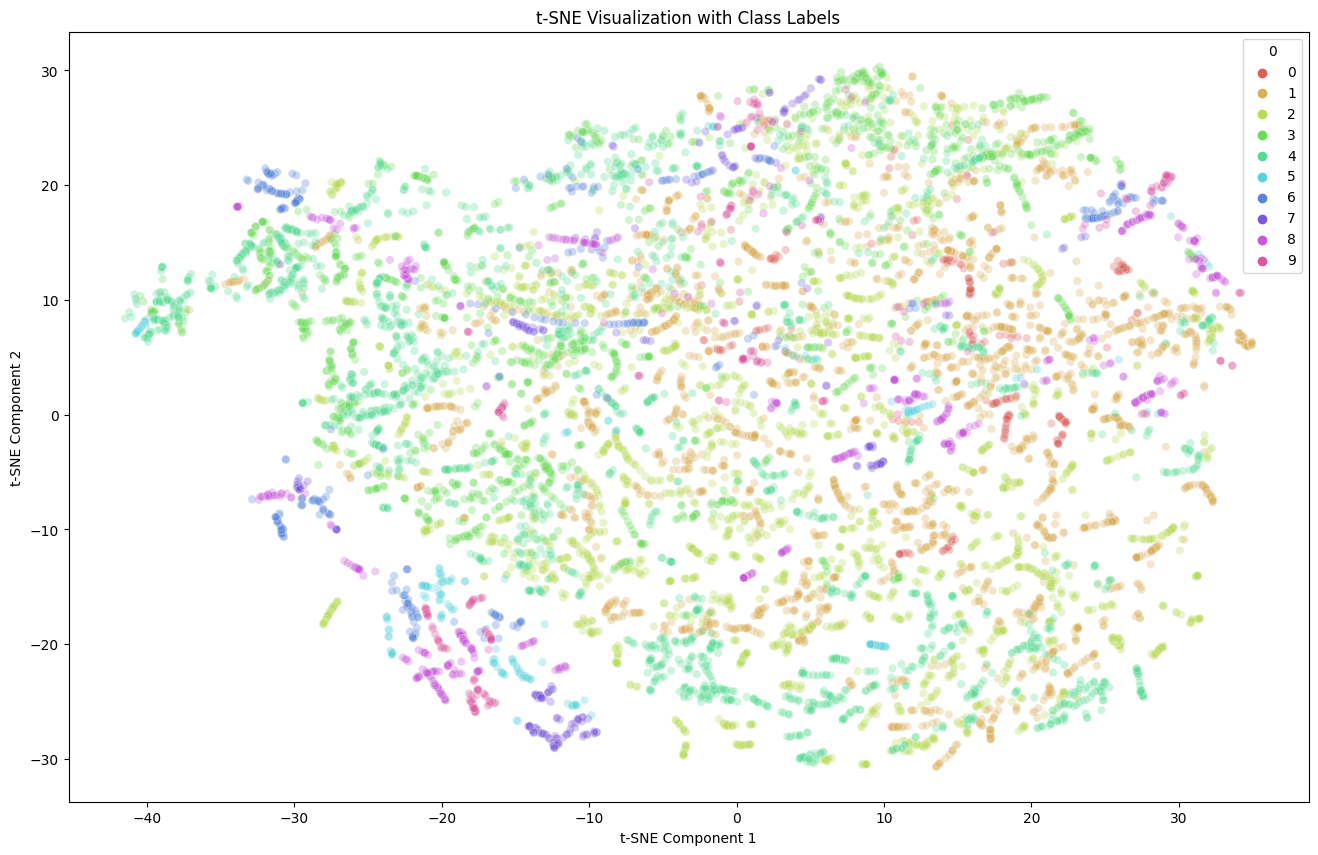

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


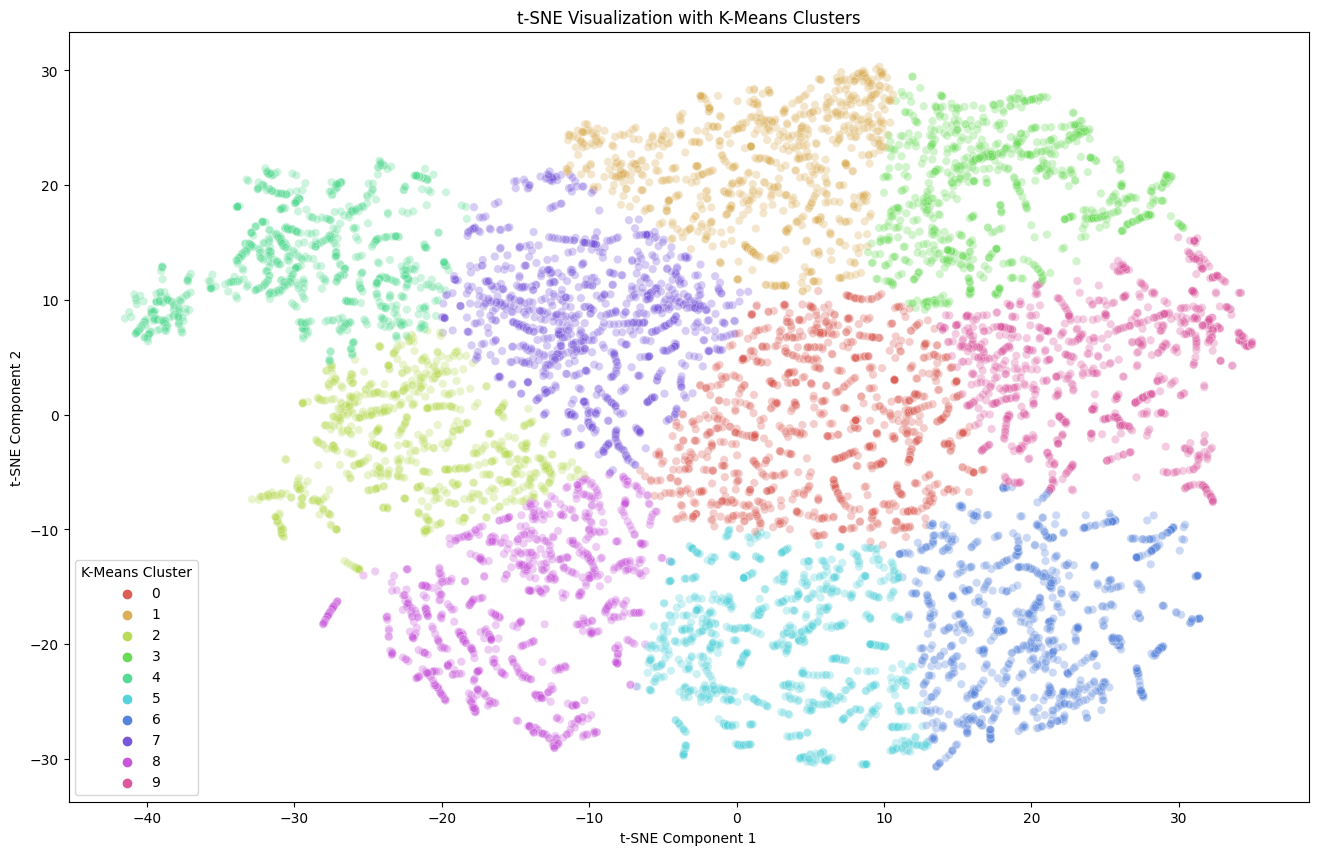

In [22]:

# Number of t-SNE components (typically 2 for visualization)
n_components_tsne = 2  # Use 2 components for 2D visualization

# Create a t-SNE instance and fit-transform the original data
tsne = TSNE(n_components=n_components_tsne, verbose=3, perplexity=100, n_iter=500)
tsne_results = tsne.fit_transform(trainDataSet)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=[f't-SNE{i+1}' for i in range(n_components_tsne)])

# Visualize based on class labels
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="t-SNE1", y="t-SNE2",
    hue=classDataSet["0"],  # Replace "0" with your class label column name
    data=tsne_df,
    palette=sns.color_palette("hls", len(classDataSet["0"].unique())),
    legend="full",
    alpha=0.3
)
plt.title('t-SNE Visualization with Class Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Apply K-Means clustering to t-SNE results
n_clusters = 10  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_cluster_labels = kmeans.fit_predict(tsne_results)

# Create a DataFrame for K-Means cluster labels
kmeans_df = pd.DataFrame(data=kmeans_cluster_labels, columns=['K-Means Cluster'])

# Concatenate the K-Means cluster labels with your class labels
combined_df = pd.concat([classDataSet, kmeans_df], axis=1)

# Visualize based on K-Means cluster labels
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="t-SNE1", y="t-SNE2",
    hue=combined_df["K-Means Cluster"],
    data=tsne_df,
    palette=sns.color_palette("hls", n_clusters),
    legend="full",
    alpha=0.3
)
plt.title('t-SNE Visualization with K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()